Chronological split of year + month

Inital Exploratory Data Analysis (EDA)

In [99]:
import pandas as pd

# ---------------------------------------------------------
# 1. Load dataset
# ---------------------------------------------------------
df = pd.read_csv("D:\\hotel_booking_prediction\\hotel_booking.csv")

# ---------------------------------------------------------
# 2. Convert month name to month number
# ---------------------------------------------------------
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_month_num'] = df['arrival_date_month'].map(month_map)

# ---------------------------------------------------------
# 3. Create date (YYYY-MM-DD) - NO TIMESTAMP
# ---------------------------------------------------------
df['arrival_date'] = df.apply(
    lambda row: f"{int(row['arrival_date_year']):04d}-"
                f"{int(row['arrival_month_num']):02d}-"
                f"{int(row['arrival_date_day_of_month']):02d}",
    axis=1
)

# ---------------------------------------------------------
# 4. Define split date ranges
# ---------------------------------------------------------
train_start = "2015-01-01"
train_end   = "2016-07-31"

test_start  = "2016-08-01"
test_end    = "2017-12-31"

# ---------------------------------------------------------
# 5. Split dataset
# ---------------------------------------------------------
train_df = df[(df['arrival_date'] >= train_start) & (df['arrival_date'] <= train_end)]
test_df  = df[(df['arrival_date'] >= test_start)  & (df['arrival_date'] <= test_end)]

# ---------------------------------------------------------
# 6. Columns to remove permanently
# ---------------------------------------------------------
columns_to_drop = [
    'arrival_month_num',
    'arrival_date_month',
    'arrival_date_year',
    'arrival_date_day_of_month',
    'credit_card',
    'email',
    'phone-number',
    'hotel',
    'arrival_date_week_number',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'meal',
    'distribution_channel',
    'is_repeated_guest',
    'previous_bookings_not_canceled',
    'assigned_room_type',
    'agent',
    'company',
    'days_in_waiting_list',
    'reservation_status'  # leakage — must drop
]

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

# ---------------------------------------------------------
# 7. Remove "is_canceled" column ONLY from test set
# ---------------------------------------------------------
if "is_canceled" in test_df.columns:
    test_df.drop("is_canceled", axis=1, inplace=True)

# ---------------------------------------------------------
# 8. Save final CSV files
# ---------------------------------------------------------
train_df.to_csv("D:\\hotel_booking_prediction\\train.csv", index=False)
test_df.to_csv("D:\\hotel_booking_prediction\\test.csv", index=False)

# ---------------------------------------------------------
# 9. Verification
# ---------------------------------------------------------
print("Train Shape:", train_df.shape)
print("Test Shape :", test_df.shape)

print("\nTrain Date Range:", train_df['arrival_date'].min(), "to", train_df['arrival_date'].max())
print("Test Date Range :", test_df['arrival_date'].min(), "to", test_df['arrival_date'].max())

print("\nSaved:\nD:\\hotel_booking_prediction\\train.csv\nD:\\hotel_booking_prediction\\test.csv")

Train Shape: (53729, 15)
Test Shape : (65661, 14)

Train Date Range: 2015-07-01 to 2016-07-31
Test Date Range : 2016-08-01 to 2017-08-31

Saved:
D:\hotel_booking_prediction\train.csv
D:\hotel_booking_prediction\test.csv


In [2]:
train_df.head(10)

,is_canceled,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
0,0,342,PRT,Direct,0,C,3,No Deposit,Transient,0.0,0,0,2015-07-01,Ernest Barnes,2015-07-01
1,0,737,PRT,Direct,0,C,4,No Deposit,Transient,0.0,0,0,2015-07-01,Andrea Baker,2015-07-01
2,0,7,GBR,Direct,0,A,0,No Deposit,Transient,75.0,0,0,2015-07-02,Rebecca Parker,2015-07-01
3,0,13,GBR,Corporate,0,A,0,No Deposit,Transient,75.0,0,0,2015-07-02,Laura Murray,2015-07-01
4,0,14,GBR,Online TA,0,A,0,No Deposit,Transient,98.0,0,1,2015-07-03,Linda Hines,2015-07-01
5,0,14,GBR,Online TA,0,A,0,No Deposit,Transient,98.0,0,1,2015-07-03,Jasmine Fletcher,2015-07-01
6,0,0,PRT,Direct,0,C,0,No Deposit,Transient,107.0,0,0,2015-07-03,Dylan Rangel,2015-07-01
7,0,9,PRT,Direct,0,C,0,No Deposit,Transient,103.0,0,1,2015-07-03,William Velez,2015-07-01
8,1,85,PRT,Online TA,0,A,0,No Deposit,Transient,82.0,0,1,2015-05-06,Steven Murphy,2015-07-01
9,1,75,PRT,Offline TA/TO,0,D,0,No Deposit,Transient,105.5,0,0,2015-04-22,Michael Moore,2015-07-01


In [3]:
train_df.tail(10)

,is_canceled,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
94609,0,140,FRA,Online TA,0,D,1,No Deposit,Transient-Party,132.48,0,0,2016-08-07,Debra Palmer,2016-07-31
94615,0,125,FRA,Online TA,0,D,1,No Deposit,Transient,126.51,1,0,2016-08-07,Ariana Baker,2016-07-31
94617,0,125,FRA,Online TA,0,D,1,No Deposit,Transient,140.27,0,0,2016-08-07,Raymond Allen,2016-07-31
94633,0,84,CN,Online TA,0,D,1,No Deposit,Transient,141.69,1,1,2016-08-07,Mercedes Carlson,2016-07-31
94647,0,123,CN,Offline TA/TO,0,A,1,No Deposit,Transient,96.90,0,2,2016-08-08,Lauren Clayton,2016-07-31
94677,0,137,ITA,Online TA,0,D,0,No Deposit,Transient,147.90,0,1,2016-08-08,John Chen,2016-07-29
94727,0,123,FRA,Online TA,0,D,0,No Deposit,Transient,112.24,0,1,2016-08-09,Michael Lee,2016-07-31
94954,0,146,ITA,Online TA,0,D,0,No Deposit,Transient,117.66,0,1,2016-08-13,Jeremy Graves,2016-07-30
95150,0,152,FRA,Online TA,0,A,0,No Deposit,Transient,184.34,0,2,2016-08-15,Linda Norton,2016-07-30
103758,0,0,PRT,Complementary,0,E,0,No Deposit,Transient,0.00,0,1,2015-10-03,Gregory Walker,2015-10-02


In [4]:
test_df.head(10)

,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
7270,148,ESP,Online TA,0,A,0,No Deposit,Transient,160.00,0,0,2016-03-06,Tamara Pitts MD,2016-08-01
7271,148,ESP,Online TA,0,A,0,No Deposit,Transient,160.00,0,0,2016-03-06,Maureen Sherman,2016-08-01
7272,199,PRT,Direct,0,A,1,No Deposit,Transient,170.00,0,0,2016-08-01,Casey Krause,2016-08-01
7273,201,PRT,Online TA,0,D,0,No Deposit,Transient,172.80,0,1,2016-02-03,Marilyn Hamilton,2016-08-01
7274,265,PRT,Online TA,0,G,0,No Deposit,Transient,240.00,0,0,2016-04-26,Juan Cain,2016-08-01
7275,285,LUX,Direct,0,G,0,No Deposit,Transient,153.25,0,1,2016-08-05,Christine Sullivan,2016-08-01
7276,285,PRT,Direct,0,G,0,No Deposit,Transient,165.25,0,1,2016-08-05,Edward Avery,2016-08-01
7277,147,PRT,Offline TA/TO,0,D,0,No Deposit,Transient,115.20,0,0,2016-05-18,Sarah Kelly,2016-08-01
7278,270,PRT,Online TA,0,E,4,No Deposit,Transient,232.00,0,1,2016-03-23,Sara Garcia,2016-08-01
7279,173,PRT,Online TA,0,A,0,No Deposit,Transient,204.00,0,1,2016-04-13,Suzanne Robinson,2016-08-01


In [5]:
test_df.tail(10)

,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
119380,44,DEU,Online TA,0,A,0,No Deposit,Transient,140.75,0,1,2017-09-04,Wanda Jones,2017-08-31
119381,188,DEU,Direct,0,A,0,No Deposit,Transient,99.00,0,0,2017-09-05,Betty Taylor,2017-08-31
119382,135,JPN,Online TA,0,G,0,No Deposit,Transient,209.00,0,0,2017-09-05,Cesar Moreno,2017-08-30
119383,164,DEU,Offline TA/TO,0,A,0,No Deposit,Transient,87.60,0,0,2017-09-06,Jose Andersen,2017-08-31
119384,21,BEL,Offline TA/TO,0,A,0,No Deposit,Transient,96.14,0,2,2017-09-06,James Mccarty,2017-08-30
119385,23,BEL,Offline TA/TO,0,A,0,No Deposit,Transient,96.14,0,0,2017-09-06,Claudia Johnson,2017-08-30
119386,102,FRA,Online TA,0,E,0,No Deposit,Transient,225.43,0,2,2017-09-07,Wesley Aguilar,2017-08-31
119387,34,DEU,Online TA,0,D,0,No Deposit,Transient,157.71,0,4,2017-09-07,Mary Morales,2017-08-31
119388,109,GBR,Online TA,0,A,0,No Deposit,Transient,104.40,0,0,2017-09-07,Caroline Conley MD,2017-08-31
119389,205,DEU,Online TA,0,A,0,No Deposit,Transient,151.20,0,2,2017-09-07,Ariana Michael,2017-08-29


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53729 entries, 0 to 103758
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  53729 non-null  int64  
 1   lead_time                    53729 non-null  int64  
 2   country                      53425 non-null  object 
 3   market_segment               53729 non-null  object 
 4   previous_cancellations       53729 non-null  int64  
 5   reserved_room_type           53729 non-null  object 
 6   booking_changes              53729 non-null  int64  
 7   deposit_type                 53729 non-null  object 
 8   customer_type                53729 non-null  object 
 9   adr                          53729 non-null  float64
 10  required_car_parking_spaces  53729 non-null  int64  
 11  total_of_special_requests    53729 non-null  int64  
 12  reservation_status_date      53729 non-null  object 
 13  name                

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65661 entries, 7270 to 119389
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_time                    65661 non-null  int64  
 1   country                      65477 non-null  object 
 2   market_segment               65661 non-null  object 
 3   previous_cancellations       65661 non-null  int64  
 4   reserved_room_type           65661 non-null  object 
 5   booking_changes              65661 non-null  int64  
 6   deposit_type                 65661 non-null  object 
 7   customer_type                65661 non-null  object 
 8   adr                          65661 non-null  float64
 9   required_car_parking_spaces  65661 non-null  int64  
 10  total_of_special_requests    65661 non-null  int64  
 11  reservation_status_date      65661 non-null  object 
 12  name                         65661 non-null  object 
 13  arrival_date     

In [8]:
train_df.columns

Index(['is_canceled', 'lead_time', 'country', 'market_segment',
       'previous_cancellations', 'reserved_room_type', 'booking_changes',
       'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'name',
       'arrival_date'],
      dtype='object')

In [9]:
test_df.columns

Index(['lead_time', 'country', 'market_segment', 'previous_cancellations',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'name',
       'arrival_date'],
      dtype='object')

In [10]:
train_df.describe()

,is_canceled,lead_time,previous_cancellations,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,53729.000000,53729.000000,53729.000000,53729.000000,53729.000000,53729.000000,53729.000000
mean,0.355190,91.786931,0.175510,0.195984,90.601744,0.065663,0.456067
std,0.478575,96.237636,1.234982,0.612590,47.242867,0.248519,0.712959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,0.000000,0.000000,62.480000,0.000000,0.000000
50%,0.000000,60.000000,0.000000,0.000000,85.000000,0.000000,0.000000
75%,1.000000,139.000000,0.000000,0.000000,111.350000,0.000000,1.000000
max,1.000000,737.000000,26.000000,21.000000,5400.000000,2.000000,5.000000


In [11]:
train_df.describe(include = 'object')

,country,market_segment,reserved_room_type,deposit_type,customer_type,reservation_status_date,name,arrival_date
count,53425,53729,53729,53729,53729,53729,53729,53729
unique,146,8,10,3,4,535,42784,397
top,PRT,Online TA,A,No Deposit,Transient,2015-07-06,John Smith,2015-12-05
freq,27255,20597,40866,45842,35556,805,25,448


In [12]:
test_df.describe()

,lead_time,previous_cancellations,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,65661.000000,65661.000000,65661.000000,65661.000000,65661.000000,65661.000000
mean,114.014453,0.014788,0.241696,111.019882,0.059944,0.665707
std,113.857019,0.191370,0.682405,51.281101,0.242589,0.840911
min,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,77.860000,0.000000,0.000000
50%,79.000000,0.000000,0.000000,102.600000,0.000000,0.000000
75%,175.000000,0.000000,0.000000,135.900000,0.000000,1.000000
max,629.000000,6.000000,18.000000,510.000000,8.000000,5.000000


In [13]:
test_df.describe(include = 'object')

,country,market_segment,reserved_room_type,deposit_type,customer_type,reservation_status_date,name,arrival_date
count,65477,65661,65661,65661,65661,65661,65661,65661
unique,161,7,9,3,4,660,50578,396
top,PRT,Online TA,A,No Deposit,Transient,2015-10-21,Robert Smith,2016-11-07
freq,21335,35880,45128,58799,54057,793,30,366


In [14]:
num_cols = train_df.select_dtypes(include=['int64', 'float64'])
num_cols

,is_canceled,lead_time,previous_cancellations,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,3,0.00,0,0
1,0,737,0,4,0.00,0,0
2,0,7,0,0,75.00,0,0
3,0,13,0,0,75.00,0,0
4,0,14,0,0,98.00,0,1
...,...,...,...,...,...,...,...
94677,0,137,0,0,147.90,0,1
94727,0,123,0,0,112.24,0,1
94954,0,146,0,0,117.66,0,1
95150,0,152,0,0,184.34,0,2


In [15]:
cat_cols = train_df.select_dtypes(include=['object'])
cat_cols

,country,market_segment,reserved_room_type,deposit_type,customer_type,reservation_status_date,name,arrival_date
0,PRT,Direct,C,No Deposit,Transient,2015-07-01,Ernest Barnes,2015-07-01
1,PRT,Direct,C,No Deposit,Transient,2015-07-01,Andrea Baker,2015-07-01
2,GBR,Direct,A,No Deposit,Transient,2015-07-02,Rebecca Parker,2015-07-01
3,GBR,Corporate,A,No Deposit,Transient,2015-07-02,Laura Murray,2015-07-01
4,GBR,Online TA,A,No Deposit,Transient,2015-07-03,Linda Hines,2015-07-01
...,...,...,...,...,...,...,...,...
94677,ITA,Online TA,D,No Deposit,Transient,2016-08-08,John Chen,2016-07-29
94727,FRA,Online TA,D,No Deposit,Transient,2016-08-09,Michael Lee,2016-07-31
94954,ITA,Online TA,D,No Deposit,Transient,2016-08-13,Jeremy Graves,2016-07-30
95150,FRA,Online TA,A,No Deposit,Transient,2016-08-15,Linda Norton,2016-07-30


In [16]:
num_cols.columns.tolist()

['is_canceled',
 'lead_time',
 'previous_cancellations',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [17]:
cat_cols.columns.tolist()

['country',
 'market_segment',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date',
 'name',
 'arrival_date']

Exploratory Data Analysis (EDA)

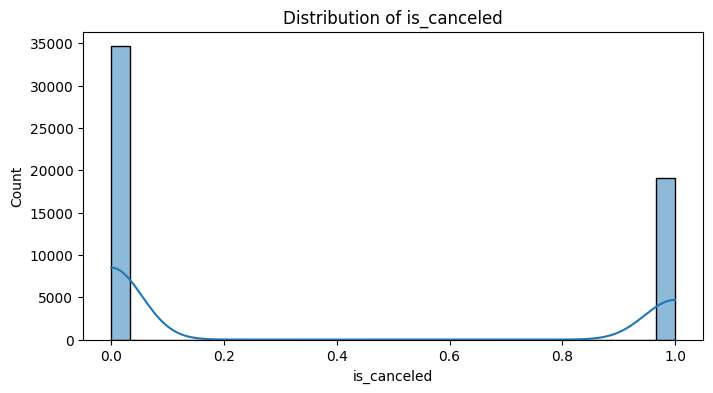

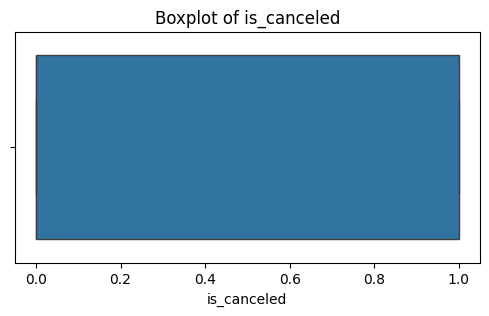

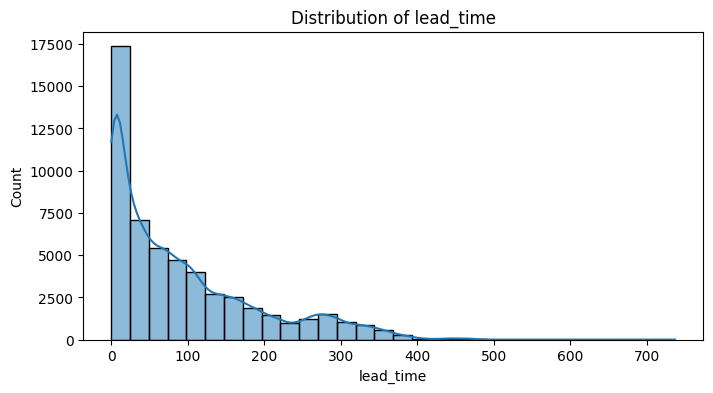

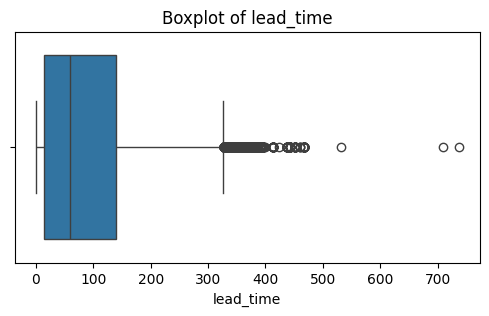

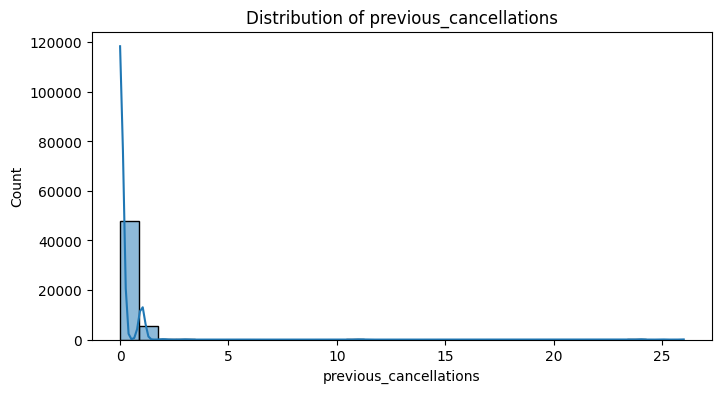

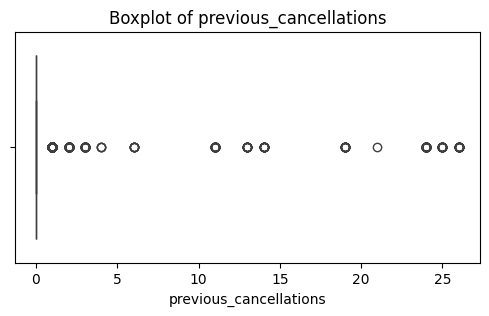

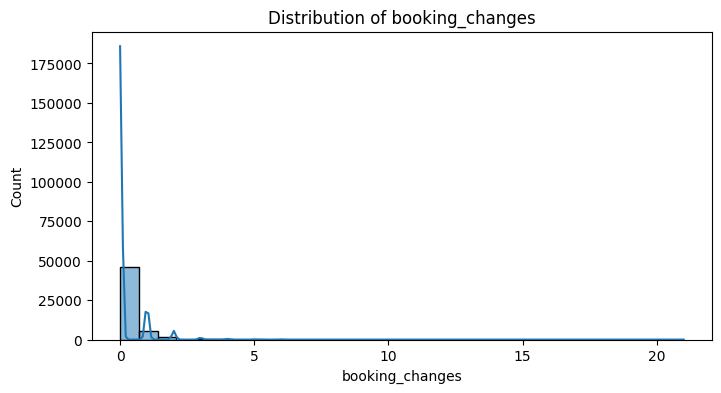

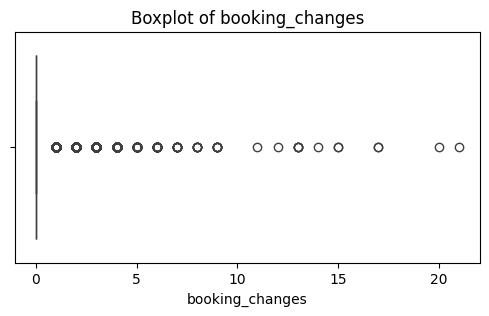

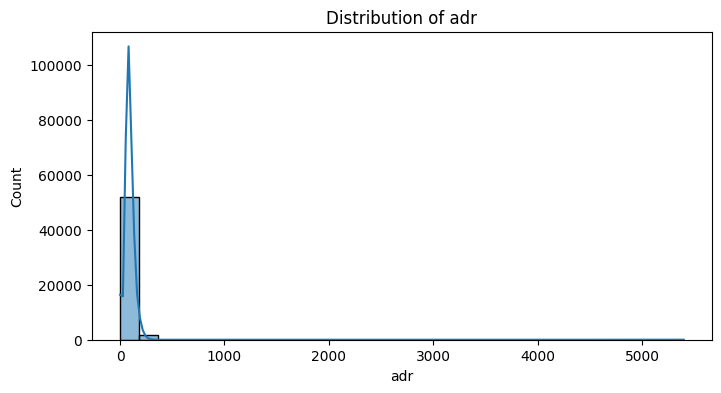

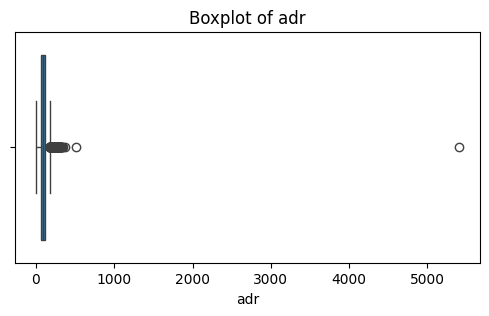

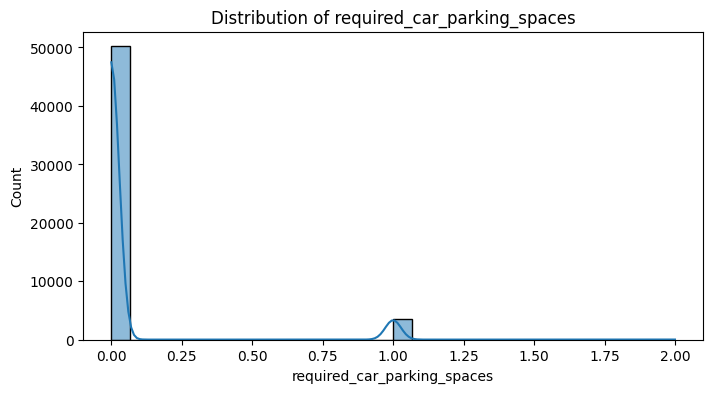

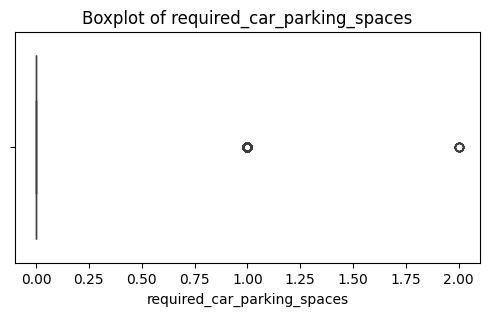

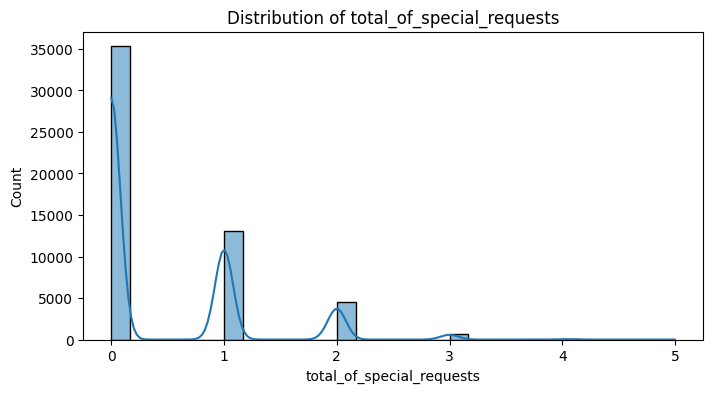

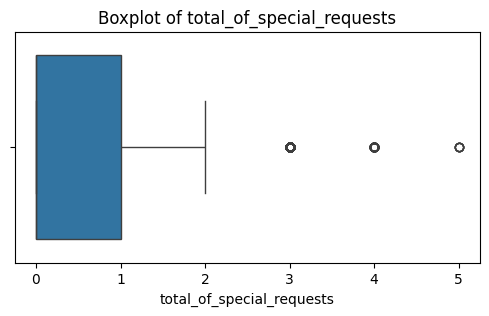

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================
# Univariate Numerical Analysis
# =============================================================
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,3))
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

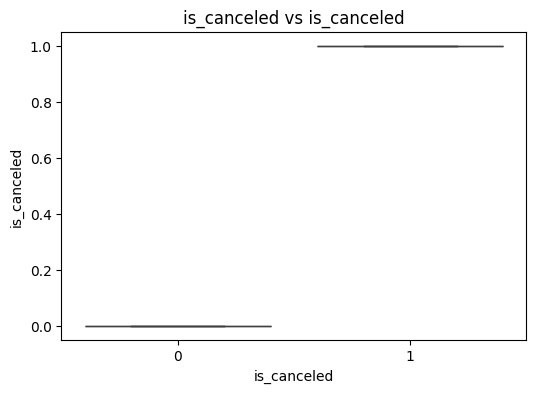

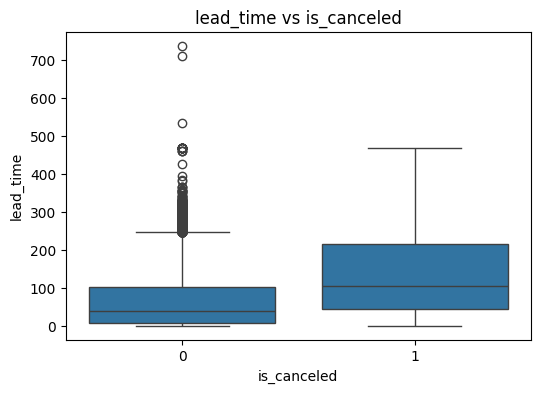

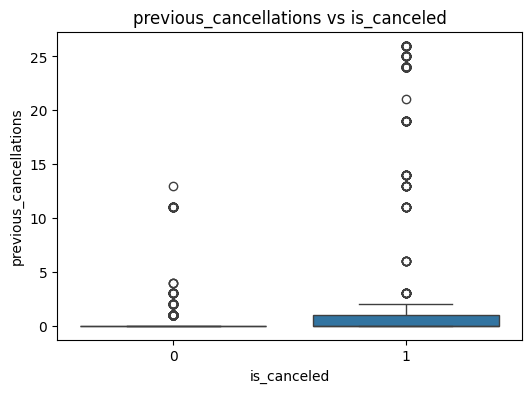

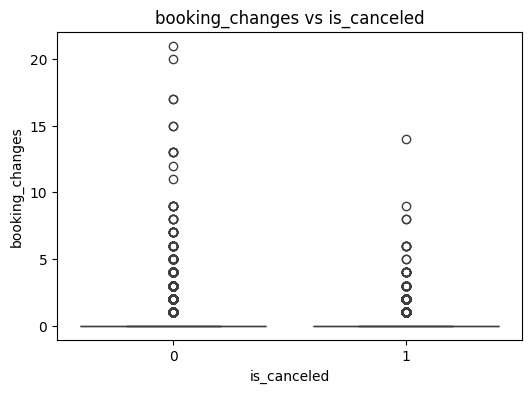

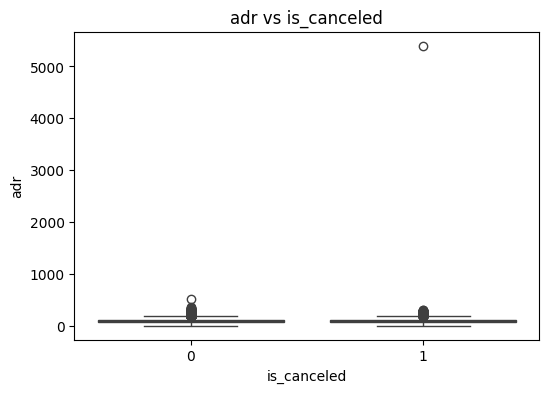

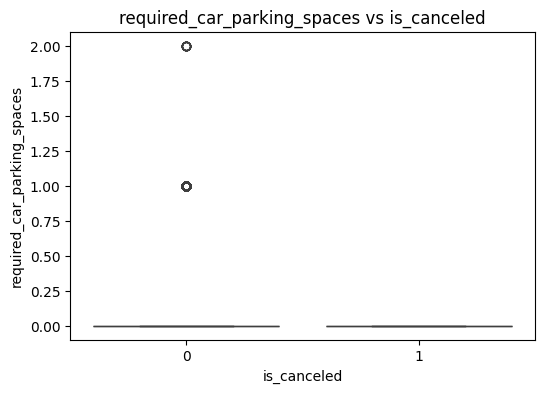

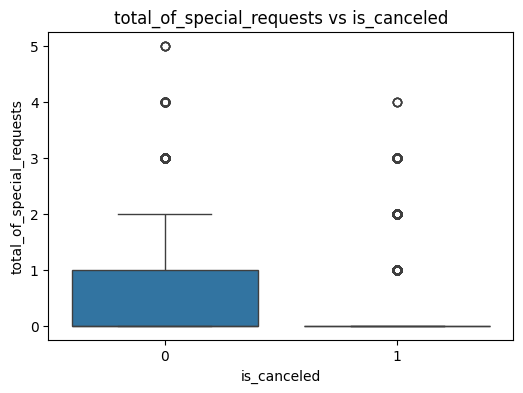

In [19]:
# =============================================================
# Numerical vs Target (is_canceled)
# =============================================================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_df['is_canceled'], y=train_df[col])
    plt.title(f"{col} vs {'is_canceled'}")
    plt.show()

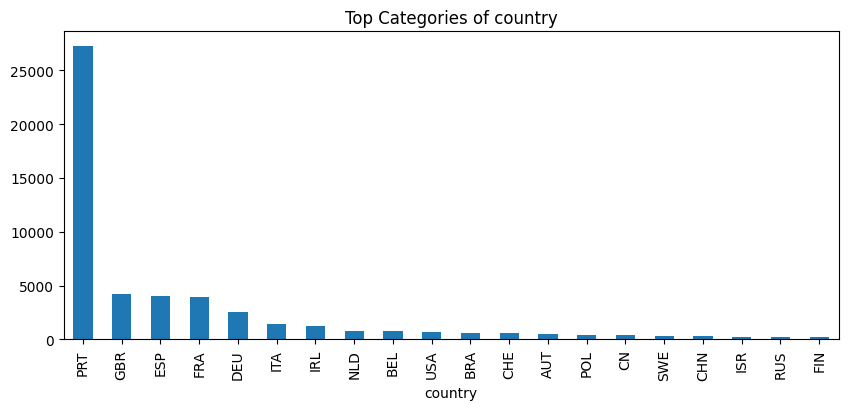

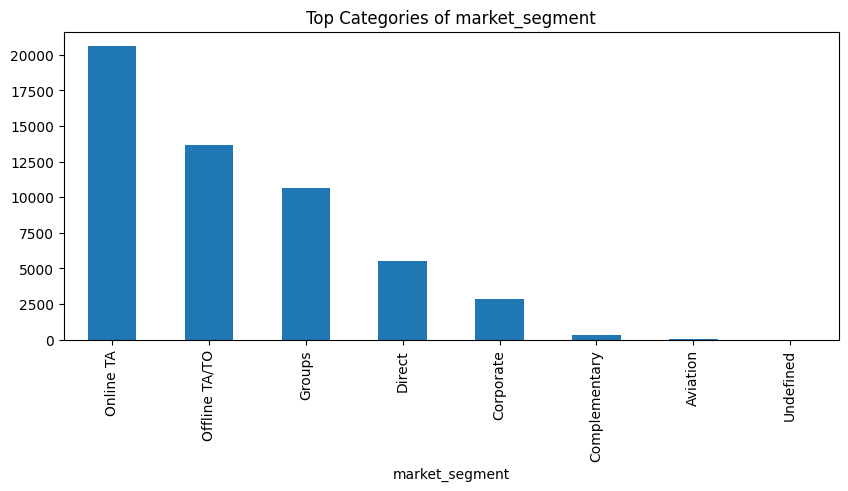

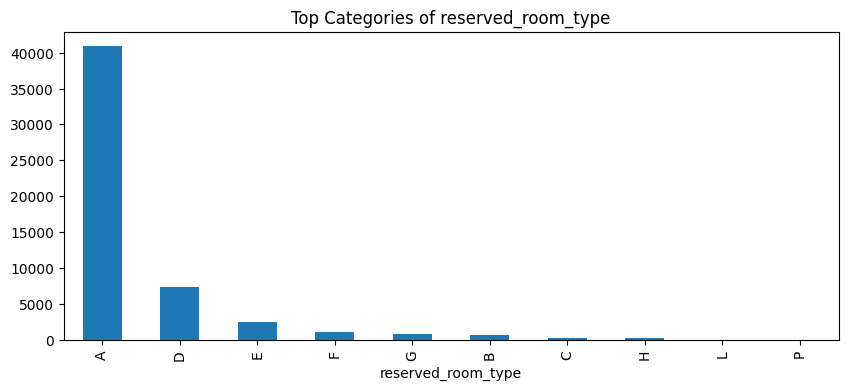

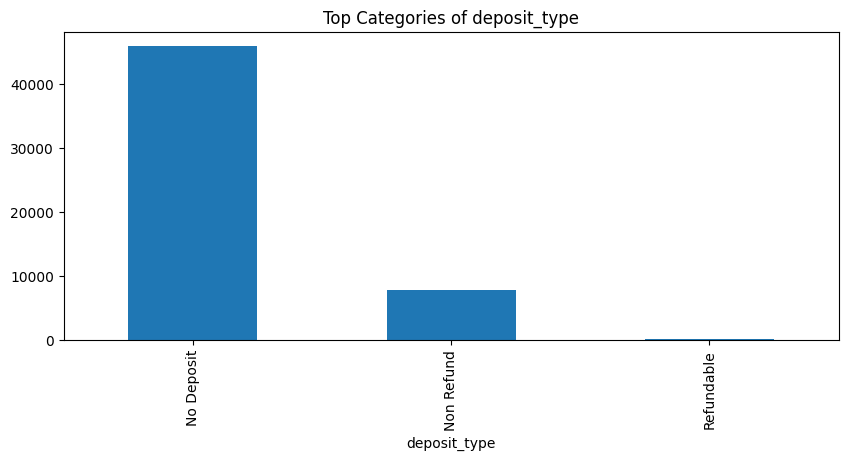

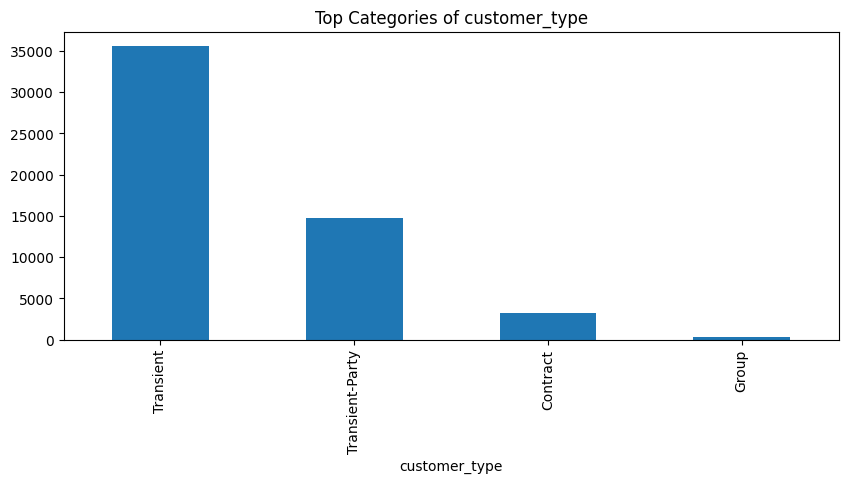

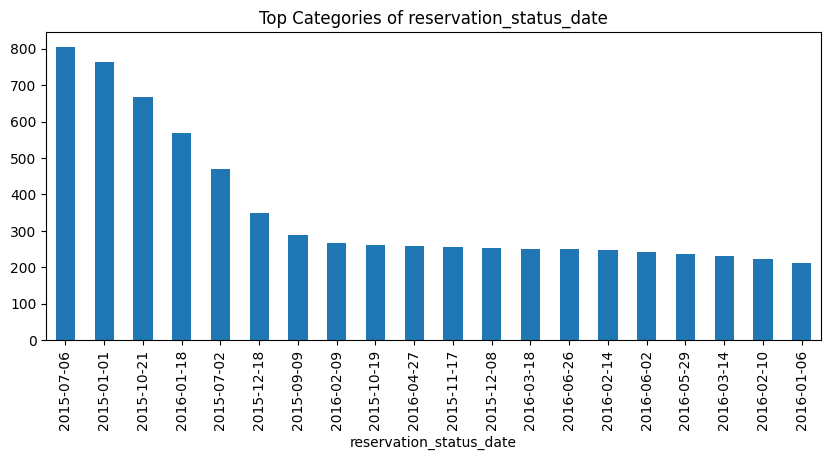

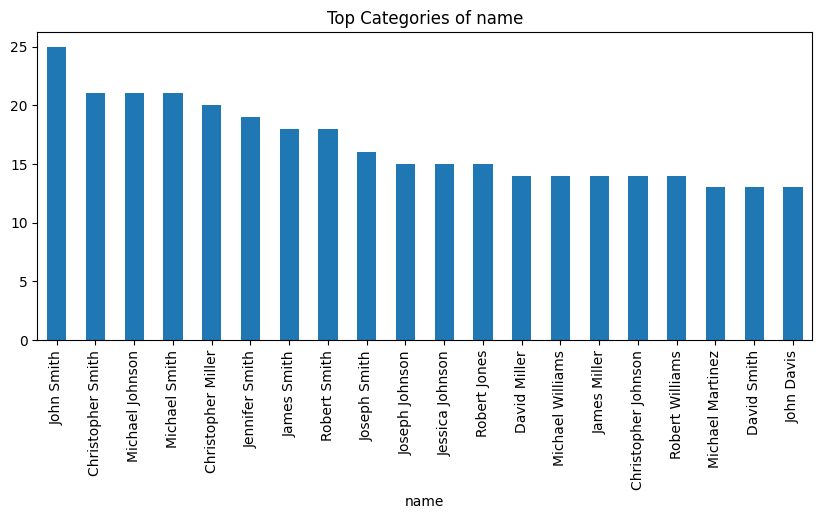

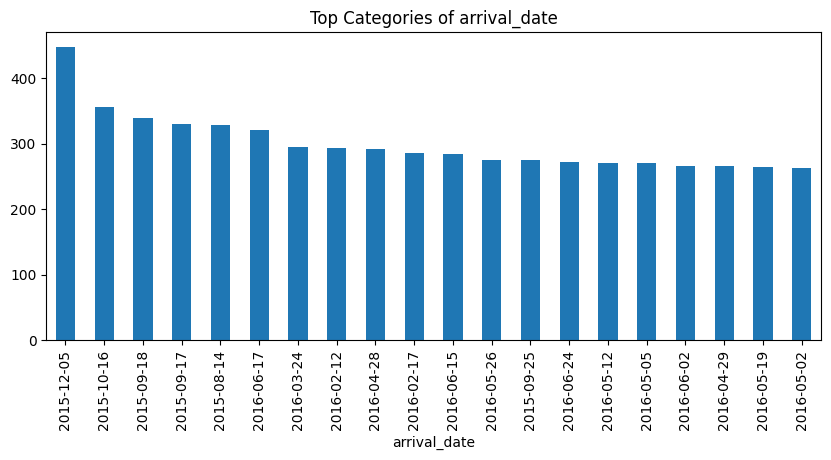

In [20]:
# =============================================================
# Categorical - Univariate
# =============================================================
for col in cat_cols:
    plt.figure(figsize=(10,4))
    train_df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Top Categories of {col}")
    plt.show()

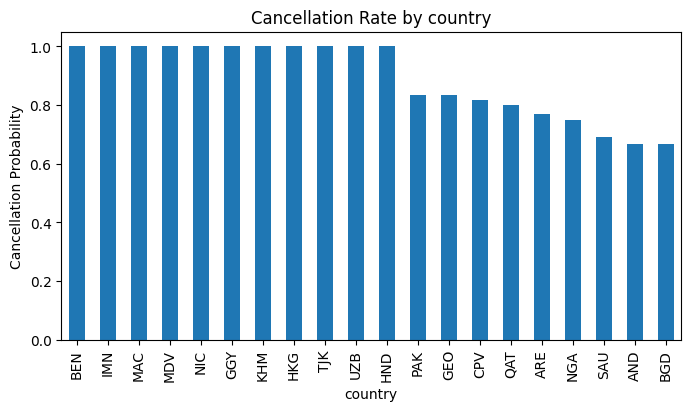

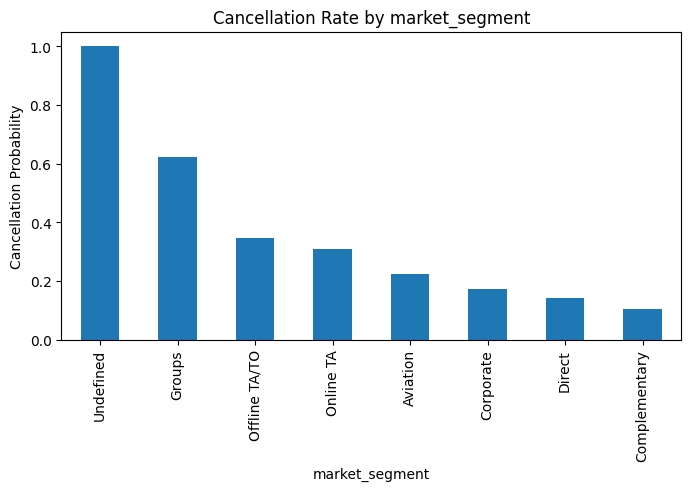

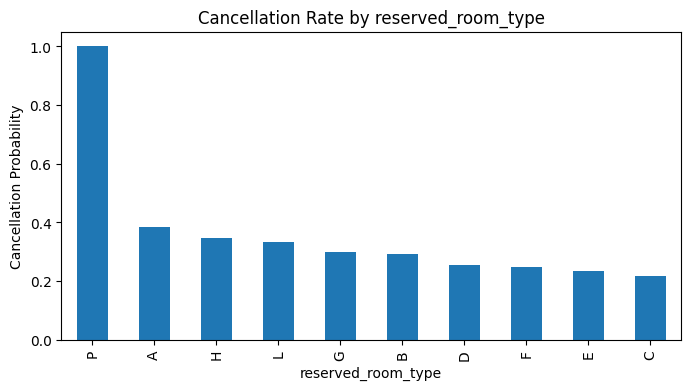

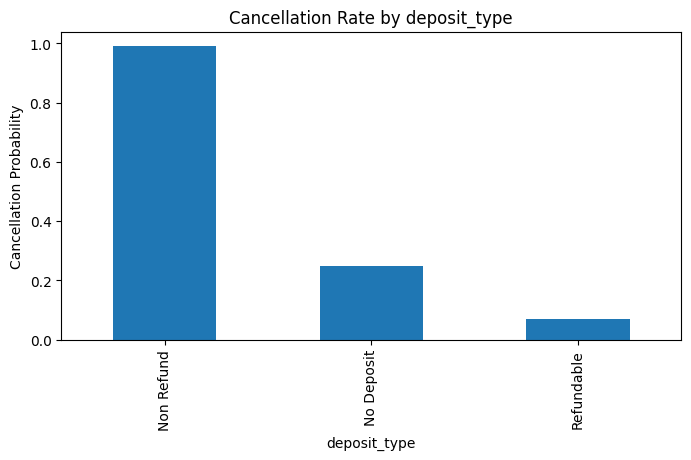

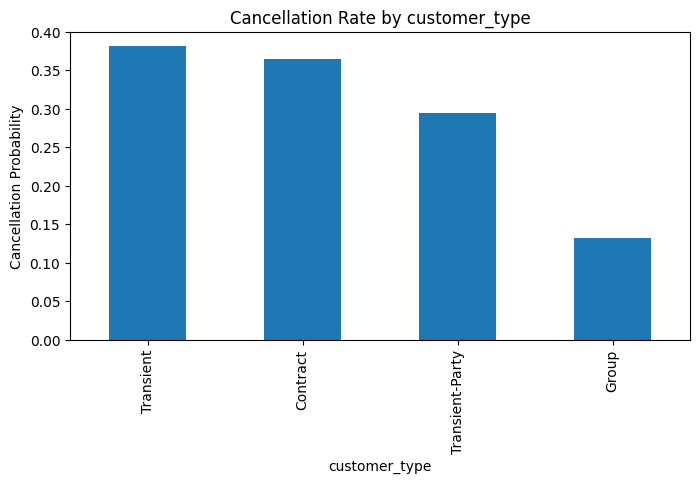

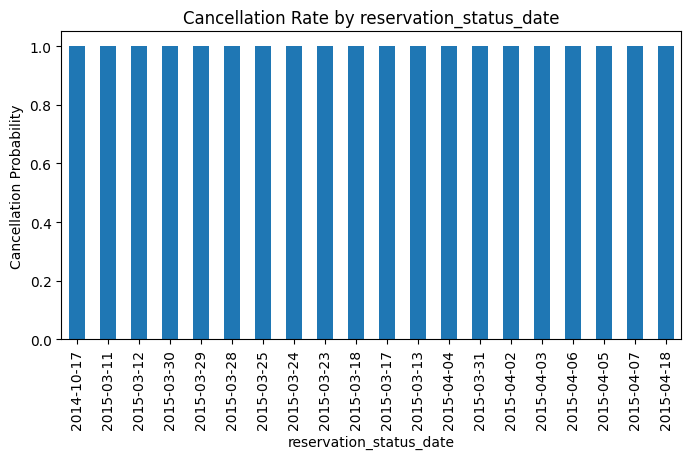

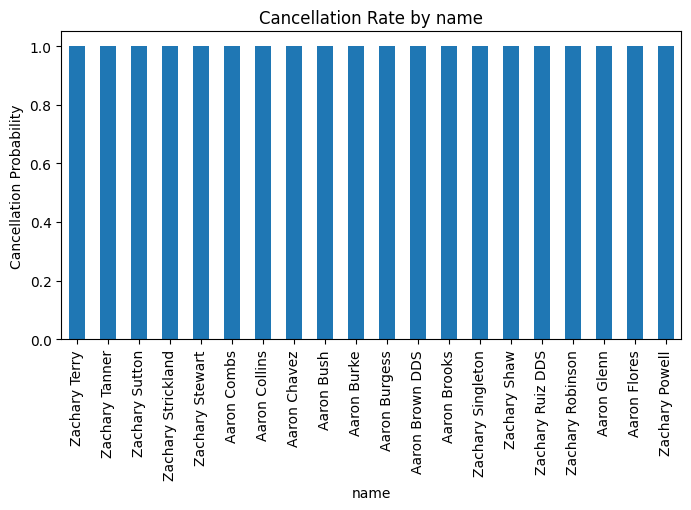

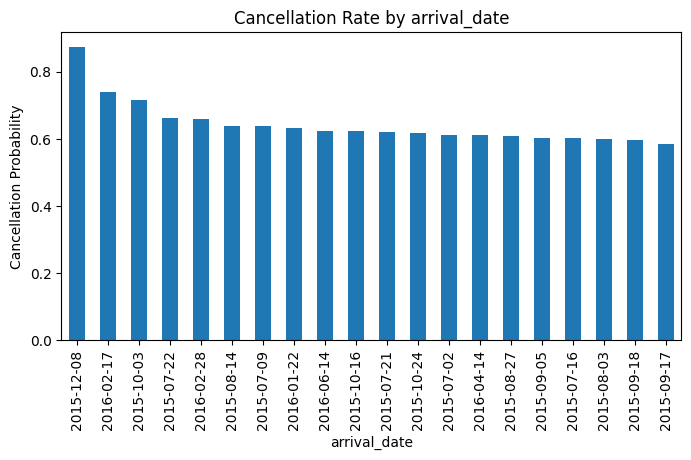

In [21]:
# =============================================================
# Categorical vs Target
# =============================================================
for col in cat_cols:
    plt.figure(figsize=(8,4))
    cancellation_rate = train_df.groupby(col)['is_canceled'].mean().sort_values(ascending=False).head(20)
    cancellation_rate.plot(kind='bar')
    plt.title(f"Cancellation Rate by {col}")
    plt.ylabel("Cancellation Probability")
    plt.show()

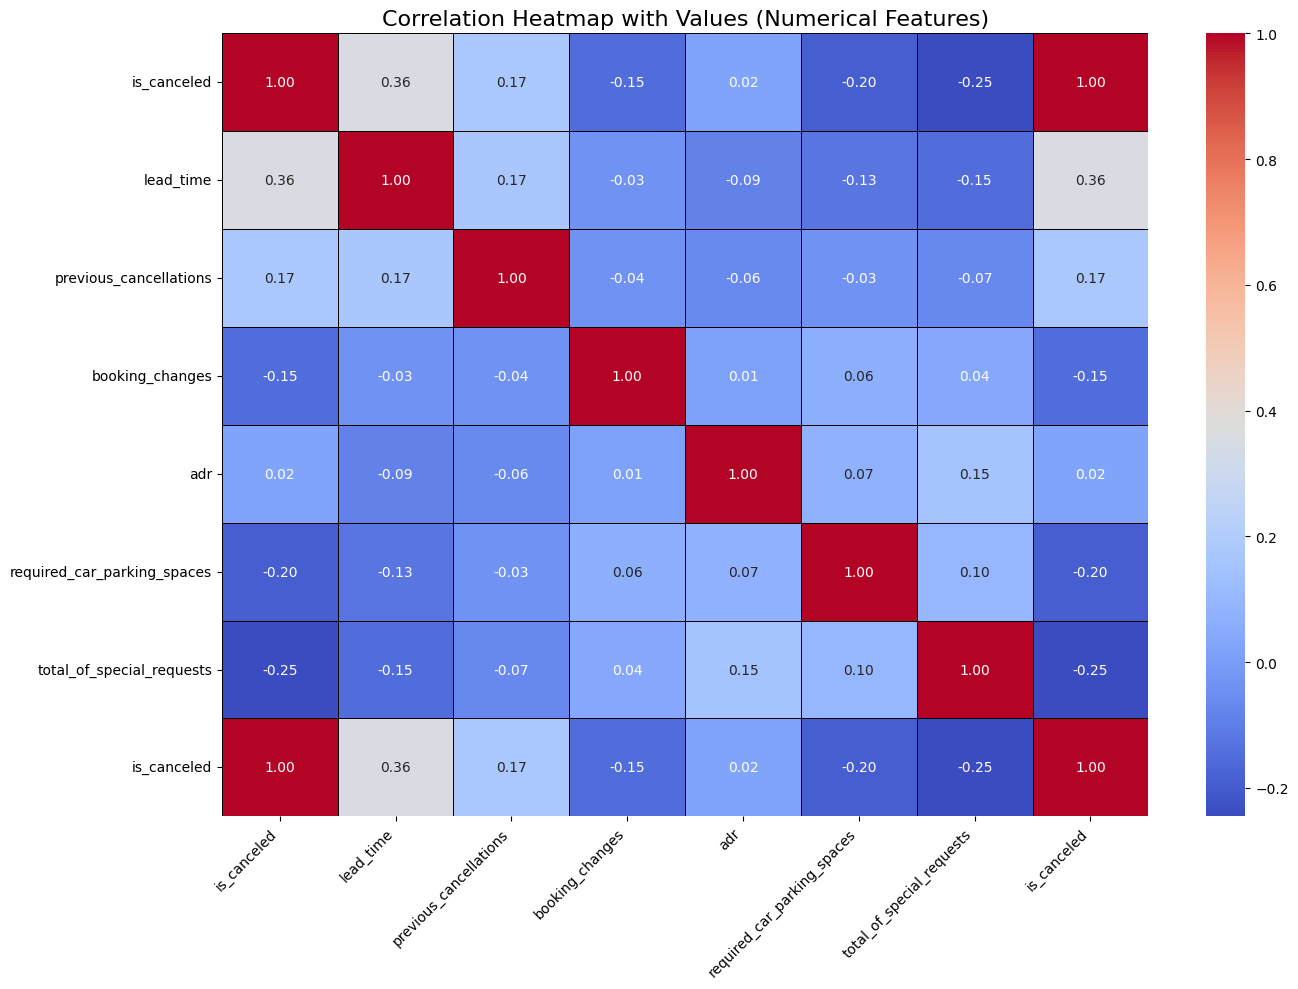

In [22]:
num_cols = num_cols.columns.tolist() if hasattr(num_cols, "columns") else num_cols

# --- Ensure num_cols is a list ---
num_cols = num_cols.columns.tolist() if hasattr(num_cols, "columns") else num_cols

# --- Compute correlation ---
corr_matrix = train_df[num_cols + ['is_canceled']].corr()

plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.7,
    linecolor='black'
)
plt.title("Correlation Heatmap with Values (Numerical Features)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Pre-processing

In [23]:
train_df.isna().sum()

is_canceled                      0
lead_time                        0
country                        304
market_segment                   0
previous_cancellations           0
reserved_room_type               0
booking_changes                  0
deposit_type                     0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status_date          0
name                             0
arrival_date                     0
dtype: int64

In [24]:
test_df.isna().sum()

lead_time                        0
country                        184
market_segment                   0
previous_cancellations           0
reserved_room_type               0
booking_changes                  0
deposit_type                     0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status_date          0
name                             0
arrival_date                     0
dtype: int64

In [25]:
null_percentage = (train_df.isna().sum() / train_df.shape[0]) * 100
null_percentage

is_canceled                    0.000000
lead_time                      0.000000
country                        0.565802
market_segment                 0.000000
previous_cancellations         0.000000
reserved_room_type             0.000000
booking_changes                0.000000
deposit_type                   0.000000
customer_type                  0.000000
adr                            0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
reservation_status_date        0.000000
name                           0.000000
arrival_date                   0.000000
dtype: float64

In [26]:
# Filter only columns with nulls
null_cols = null_percentage[null_percentage > 0]

# Create a dataframe with column name, null %, and dtype
null_summary = pd.DataFrame({
    "null_percentage": null_cols,
    "dtype": train_df[null_cols.index].dtypes
})

null_summary

,null_percentage,dtype
country,0.565802,object


In [27]:
# high_null_features = null_percentage[null_percentage > 50]
# high_null_features

In [28]:
# cols_to_drop = ['company']

# train_df = train_df.drop(columns=cols_to_drop)
# test_df = test_df.drop(columns=cols_to_drop)

In [29]:
train_df.columns.tolist()

['is_canceled',
 'lead_time',
 'country',
 'market_segment',
 'previous_cancellations',
 'reserved_room_type',
 'booking_changes',
 'deposit_type',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'name',
 'arrival_date']

In [30]:
test_df.columns.tolist()

['lead_time',
 'country',
 'market_segment',
 'previous_cancellations',
 'reserved_room_type',
 'booking_changes',
 'deposit_type',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'name',
 'arrival_date']

In [31]:
train_df.shape, test_df.shape

((53729, 15), (65661, 14))

In [32]:
train_df['country'] = train_df['country'].astype(str)
test_df['country'] = test_df['country'].astype(str)

# Identify numeric and categorical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object', 'string']).columns

# Find columns with missing values
num_cols_na = [col for col in num_cols if train_df[col].isna().sum() > 0]
cat_cols_na = [col for col in cat_cols if train_df[col].isna().sum() > 0]

print("Numeric columns with NA:", num_cols_na)
print("Categorical columns with NA:", cat_cols_na)

# -----------------------------
# Fill numeric missing values → median
# -----------------------------
for col in num_cols_na:
    median_value = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_value)
    test_df[col] = test_df[col].fillna(median_value)

# -----------------------------
# Fill categorical missing values → mode
# -----------------------------
for col in cat_cols_na:
    mode_value = train_df[col].mode(dropna=True)[0]
    train_df[col] = train_df[col].fillna(mode_value)
    test_df[col] = test_df[col].fillna(mode_value)

Numeric columns with NA: []
Categorical columns with NA: []


C:\Users\OMEN\AppData\Local\Temp\ipykernel_12324\3665088302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['country'] = train_df['country'].astype(str)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_12324\3665088302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['country'] = test_df['country'].astype(str)


In [33]:
train_df.isna().sum()

is_canceled                    0
lead_time                      0
country                        0
market_segment                 0
previous_cancellations         0
reserved_room_type             0
booking_changes                0
deposit_type                   0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status_date        0
name                           0
arrival_date                   0
dtype: int64

In [34]:
test_df.isna().sum()

lead_time                      0
country                        0
market_segment                 0
previous_cancellations         0
reserved_room_type             0
booking_changes                0
deposit_type                   0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status_date        0
name                           0
arrival_date                   0
dtype: int64

Feature Engineering [Converting Categorical to Numerical Features] - LabelEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train_df[col], test_df[col]], axis=0).astype(str))

    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

C:\Users\OMEN\AppData\Local\Temp\ipykernel_12324\3991761460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = le.transform(train_df[col].astype(str))
C:\Users\OMEN\AppData\Local\Temp\ipykernel_12324\3991761460.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = le.transform(test_df[col].astype(str))
C:\Users\OMEN\AppData\Local\Temp\ipykernel_12324\3991761460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [36]:
train_df.head(10)

,is_canceled,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
0,0,342,135,3,0,2,3,0,2,0.0,0,0,121,27015,0
1,0,737,135,3,0,2,4,0,2,0.0,0,0,121,3977,0
2,0,7,59,3,0,0,0,0,2,75.0,0,0,122,64151,0
3,0,13,59,2,0,0,0,0,2,75.0,0,0,122,47596,0
4,0,14,59,6,0,0,0,0,2,98.0,0,1,123,48754,0
5,0,14,59,6,0,0,0,0,2,98.0,0,1,123,33202,0
6,0,0,135,3,0,2,0,0,2,107.0,0,0,123,24472,0
7,0,9,135,3,0,2,0,0,2,103.0,0,1,123,80921,0
8,1,85,135,6,0,0,0,0,2,82.0,0,1,72,73181,0
9,1,75,135,5,0,3,0,0,2,105.5,0,0,61,55533,0


In [37]:
test_df.head(10)

,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
7270,148,51,6,0,0,0,0,2,160.00,0,0,370,74040,397
7271,148,51,6,0,0,0,0,2,160.00,0,0,370,53590,397
7272,199,135,3,0,0,1,0,2,170.00,0,0,518,12925,397
7273,201,135,6,0,3,0,0,2,172.80,0,1,338,51632,397
7274,265,135,6,0,6,0,0,2,240.00,0,0,421,40476,397
7275,285,100,3,0,6,0,0,2,153.25,0,1,522,15398,397
7276,285,135,3,0,6,0,0,2,165.25,0,1,522,24680,397
7277,147,135,5,0,3,0,0,2,115.20,0,0,443,69036,397
7278,270,135,6,0,4,4,0,2,232.00,0,1,387,68646,397
7279,173,135,6,0,0,0,0,2,204.00,0,1,408,73809,397


In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65661 entries, 7270 to 119389
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_time                    65661 non-null  int64  
 1   country                      65661 non-null  int64  
 2   market_segment               65661 non-null  int64  
 3   previous_cancellations       65661 non-null  int64  
 4   reserved_room_type           65661 non-null  int64  
 5   booking_changes              65661 non-null  int64  
 6   deposit_type                 65661 non-null  int64  
 7   customer_type                65661 non-null  int64  
 8   adr                          65661 non-null  float64
 9   required_car_parking_spaces  65661 non-null  int64  
 10  total_of_special_requests    65661 non-null  int64  
 11  reservation_status_date      65661 non-null  int64  
 12  name                         65661 non-null  int64  
 13  arrival_date     

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65661 entries, 7270 to 119389
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_time                    65661 non-null  int64  
 1   country                      65661 non-null  int64  
 2   market_segment               65661 non-null  int64  
 3   previous_cancellations       65661 non-null  int64  
 4   reserved_room_type           65661 non-null  int64  
 5   booking_changes              65661 non-null  int64  
 6   deposit_type                 65661 non-null  int64  
 7   customer_type                65661 non-null  int64  
 8   adr                          65661 non-null  float64
 9   required_car_parking_spaces  65661 non-null  int64  
 10  total_of_special_requests    65661 non-null  int64  
 11  reservation_status_date      65661 non-null  int64  
 12  name                         65661 non-null  int64  
 13  arrival_date     

In [40]:
# Convert int64 → int32
train_df = train_df.astype({col: 'int32' for col in train_df.select_dtypes(include=['int64']).columns})
test_df  = test_df.astype({col: 'int32' for col in test_df.select_dtypes(include=['int64']).columns})

# Convert float64 → float32
train_df = train_df.astype({col: 'float32' for col in train_df.select_dtypes(include=['float64']).columns})
test_df  = test_df.astype({col: 'float32' for col in test_df.select_dtypes(include=['float64']).columns})

In [41]:
train_df.dtypes

is_canceled                      int32
lead_time                        int32
country                          int32
market_segment                   int32
previous_cancellations           int32
reserved_room_type               int32
booking_changes                  int32
deposit_type                     int32
customer_type                    int32
adr                            float32
required_car_parking_spaces      int32
total_of_special_requests        int32
reservation_status_date          int32
name                             int32
arrival_date                     int32
dtype: object

In [42]:
test_df.dtypes

lead_time                        int32
country                          int32
market_segment                   int32
previous_cancellations           int32
reserved_room_type               int32
booking_changes                  int32
deposit_type                     int32
customer_type                    int32
adr                            float32
required_car_parking_spaces      int32
total_of_special_requests        int32
reservation_status_date          int32
name                             int32
arrival_date                     int32
dtype: object

In [43]:
data = []

for col in train_df.columns:
    data.append({
        "Columns": col,
        "Column_Uniques": train_df[col].unique(),
        "No_of_Unique": train_df[col].nunique(),
        "Missing_Values": train_df[col].isnull().sum()
    })

a = pd.DataFrame(data)
a

,Columns,Column_Uniques,No_of_Unique,Missing_Values
0,is_canceled,"[0, 1]",2,0
1,lead_time,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...",388,0
2,country,"[135, 59, 169, 51, 76, 56, 177, 139, 124, 127,...",147,0
3,market_segment,"[3, 2, 6, 5, 1, 4, 7, 0]",8,0
4,previous_cancellations,"[0, 1, 2, 26, 25, 14, 3, 24, 19, 21, 4, 13, 11...",14,0
5,reserved_room_type,"[2, 0, 3, 4, 6, 5, 7, 8, 9, 1]",10,0
6,booking_changes,"[3, 4, 0, 1, 2, 5, 17, 6, 9, 13, 8, 12, 7, 20,...",18,0
7,deposit_type,"[0, 2, 1]",3,0
8,customer_type,"[2, 0, 3, 1]",4,0
9,adr,"[0.0, 75.0, 98.0, 107.0, 103.0, 82.0, 105.5, 1...",5100,0


In [44]:
data = []

for col in test_df.columns:
    data.append({
        "Columns": col,
        "Column_Uniques": test_df[col].unique(),
        "No_of_Unique": test_df[col].nunique(),
        "Missing_Values": test_df[col].isnull().sum()
    })

a = pd.DataFrame(data)
a

,Columns,Column_Uniques,No_of_Unique,Missing_Values
0,lead_time,"[148, 199, 201, 265, 285, 147, 270, 173, 141, ...",474,0
1,country,"[51, 135, 100, 133, 103, 76, 162, 29, 34, 25, ...",162,0
2,market_segment,"[6, 3, 5, 2, 4, 1, 0]",7,0
3,previous_cancellations,"[0, 1, 2, 3, 4, 5, 6]",7,0
4,reserved_room_type,"[0, 3, 6, 4, 2, 5, 7, 9, 1]",9,0
5,booking_changes,"[0, 1, 4, 2, 3, 5, 8, 7, 6, 10, 16, 13, 9, 12,...",18,0
6,deposit_type,"[0, 1, 2]",3,0
7,customer_type,"[2, 3, 0, 1]",4,0
8,adr,"[160.0, 170.0, 172.8, 240.0, 153.25, 165.25, 1...",6595,0
9,required_car_parking_spaces,"[0, 1, 2, 8, 3]",5,0


Feature Scaling

In [45]:
def get_continuous_numeric_columns(train_df, test_df, unique_threshold=3):
    """
    Finds continuous numeric columns from both train_df and test_df.
    A continuous column is numeric and has more than `unique_threshold` unique values.
    """
    # Numeric columns only
    numeric_cols_train = train_df.select_dtypes(include=['int32', 'float32']).columns
    numeric_cols_test = test_df.select_dtypes(include=['int32', 'float32']).columns

    # Common numeric columns in both train and test
    common_numeric_cols = list(set(numeric_cols_train).intersection(set(numeric_cols_test)))

    continuous_cols = []

    for col in common_numeric_cols:
        if train_df[col].nunique() > unique_threshold:
            continuous_cols.append(col)

    return continuous_cols

# Call the function
continuous_numeric_cols = get_continuous_numeric_columns(train_df, test_df)

continuous_numeric_cols

['previous_cancellations',
 'name',
 'customer_type',
 'booking_changes',
 'adr',
 'reservation_status_date',
 'market_segment',
 'total_of_special_requests',
 'arrival_date',
 'lead_time',
 'country',
 'reserved_room_type']

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[continuous_numeric_cols] = scaler.fit_transform(train_df[continuous_numeric_cols])
test_df[continuous_numeric_cols] = scaler.transform(test_df[continuous_numeric_cols])

In [47]:
train_df.head(10)

,is_canceled,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
0,0,2.599974,0.786297,-1.428170,-0.142117,0.729836,4.577359,0,-0.214296,-1.917805,0,-0.639687,-1.539434,-0.587189,-1.833978
1,0,6.704436,0.786297,-1.428170,-0.142117,0.729836,6.209788,0,-0.214296,-1.917805,0,-0.639687,-1.539434,-1.582189,-1.833978
2,0,-0.881025,-0.952879,-1.428170,-0.142117,-0.523608,-0.319929,0,-0.214296,-0.330249,0,-0.639687,-1.531431,1.016696,-1.833978
3,0,-0.818678,-0.952879,-2.227617,-0.142117,-0.523608,-0.319929,0,-0.214296,-0.330249,0,-0.639687,-1.531431,0.301694,-1.833978
4,0,-0.808287,-0.952879,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,0.156602,0,0.762930,-1.523428,0.351707,-1.833978
5,0,-0.808287,-0.952879,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,0.156602,0,0.762930,-1.523428,-0.319976,-1.833978
6,0,-0.953762,0.786297,-1.428170,-0.142117,0.729836,-0.319929,0,-0.214296,0.347109,0,-0.639687,-1.523428,-0.697020,-1.833978
7,0,-0.860242,0.786297,-1.428170,-0.142117,0.729836,-0.319929,0,-0.214296,0.262439,0,0.762930,-1.523428,1.740984,-1.833978
8,1,-0.070523,0.786297,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,-0.182077,0,0.762930,-1.931583,1.406698,-1.833978
9,1,-0.174434,0.786297,0.170725,-0.142117,1.356558,-0.319929,0,-0.214296,0.315358,0,-0.639687,-2.019617,0.644489,-1.833978


In [48]:
test_df.head(10)

,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
7270,0.584112,-1.135950,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,1.468982,0,-0.639687,0.453326,1.443797,1.575247
7271,0.584112,-1.135950,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,1.468982,0,-0.639687,0.453326,0.560572,1.575247
7272,1.114055,0.786297,-1.428170,-0.142117,-0.523608,1.312500,0,-0.214296,1.680656,0,-0.639687,1.637777,-1.195730,1.575247
7273,1.134838,0.786297,0.970172,-0.142117,1.356558,-0.319929,0,-0.214296,1.739925,0,0.762930,0.197228,0.476007,1.575247
7274,1.799864,0.786297,0.970172,-0.142117,3.236723,-0.319929,0,-0.214296,3.162375,0,-0.639687,0.861481,-0.005815,1.575247
7275,2.007685,-0.014639,-1.428170,-0.142117,3.236723,-0.319929,0,-0.214296,1.326102,0,0.762930,1.669789,-1.088922,1.575247
7276,2.007685,0.786297,-1.428170,-0.142117,3.236723,-0.319929,0,-0.214296,1.580111,0,0.762930,1.669789,-0.688037,1.575247
7277,0.573721,0.786297,0.170725,-0.142117,1.356558,-0.319929,0,-0.214296,0.520681,0,-0.639687,1.037548,1.227677,1.575247
7278,1.851819,0.786297,0.970172,-0.142117,1.983279,6.209788,0,-0.214296,2.993035,0,0.762930,0.589377,1.210833,1.575247
7279,0.843888,0.786297,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,2.400348,0,0.762930,0.757442,1.433821,1.575247


Model Building - Without Hyperparameter Tuning

In [49]:
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
%pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
%pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
train_df.columns

Index(['is_canceled', 'lead_time', 'country', 'market_segment',
       'previous_cancellations', 'reserved_room_type', 'booking_changes',
       'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'name',
       'arrival_date'],
      dtype='object')

In [53]:
test_df.columns

Index(['lead_time', 'country', 'market_segment', 'previous_cancellations',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'name',
       'arrival_date'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

X = train_df.drop(columns = ['is_canceled'])
y = train_df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LightGBM': LGBMClassifier()
}

results = {}

for name, clf in classifiers.items():

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

results_df = pd.DataFrame(results).T

# results_df_sorted = results_df.sort_values(by='F1 Score', ascending=False)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
results_df_sorted

[LightGBM] [Info] Number of positive: 15259, number of negative: 27724
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 42983, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355001 -> initscore=-0.597129
[LightGBM] [Info] Start training from score -0.597129


,Accuracy,F1 Score
XGBoost,0.981388,0.973248
CatBoost,0.978224,0.968540
LightGBM,0.973572,0.961601
HistGradientBoosting,0.973385,0.961330
Logistic Regression,0.957845,0.937179
Extra Trees,0.956263,0.935915
Random Forest,0.955798,0.935260
Decision Tree,0.947329,0.925877
Support Vector Classifier,0.935232,0.900143
K-Nearest Neighbors,0.888331,0.837178


Model Building - Hyperparameter Tuning Using Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

hp_classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LightGBM': LGBMClassifier()
}

hp_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Naive Bayes': {},
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'HistGradientBoosting': {
        'max_iter': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'min_samples_leaf': [1, 2, 4]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'num_leaves': [31, 50, 70]
    }
}

hp_tuned_results = {}

for name, clf in hp_classifiers.items():
    print(f"Performing grid search for {name}...")

    hp_grid_search = GridSearchCV(clf, hp_grids.get(name, {}), cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    # hp_grid_search = GridSearchCV(clf, hp_grids[name], cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
    hp_grid_search.fit(X_train, y_train)

    hp_best_model = hp_grid_search.best_estimator_
    y_pred = hp_best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    hp_tuned_results[name] = {
        'Best Params': hp_grid_search.best_params_,
        'Accuracy': accuracy,
        'F1 Score': f1
    }

hp_tuned_results_df = pd.DataFrame(hp_tuned_results).T

hp_tuned_results_df_sorted = hp_tuned_results_df.sort_values(by='Accuracy', ascending=False)
# hp_tuned_results_df_sorted = hp_tuned_results_df.sort_values(by='F1 Score', ascending=False)

hp_tuned_results_df_sorted

Performing grid search for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Performing grid search for K-Nearest Neighbors...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Performing grid search for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Performing grid search for Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Performing grid search for Support Vector Classifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Performing grid search for Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Performing grid search for XGBoost...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Performing grid search for AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Performing grid search for Extra Trees...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Performing grid search for HistGradientBoosti

,Best Params,Accuracy,F1 Score
XGBoost,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.981947,0.974085
LightGBM,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.981947,0.974113
HistGradientBoosting,"{'learning_rate': 0.2, 'max_depth': 7, 'max_it...",0.981575,0.973551
CatBoost,"{'depth': 7, 'iterations': 200, 'l2_leaf_reg':...",0.979248,0.970103
Support Vector Classifier,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.979155,0.969836
Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.974595,0.962993
K-Nearest Neighbors,"{'algorithm': 'auto', 'n_neighbors': 9, 'weigh...",0.894379,0.845305
AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 200}",0.892797,0.833766
Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.884143,0.830451
Random Forest,"{'max_depth': 7, 'min_samples_leaf': 4, 'min_s...",0.845431,0.723857


ROC + AUC Curve

Generating ROC for: Logistic Regression
Generating ROC for: K-Nearest Neighbors
Generating ROC for: Decision Tree
Generating ROC for: Random Forest
Generating ROC for: Support Vector Classifier
Generating ROC for: Naive Bayes
Generating ROC for: XGBoost
Generating ROC for: AdaBoost
Generating ROC for: Extra Trees
Generating ROC for: HistGradientBoosting
Generating ROC for: CatBoost
Generating ROC for: LightGBM
[LightGBM] [Info] Number of positive: 15259, number of negative: 27724
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 42983, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355001 -> initscore=-0.597129
[LightGBM] [Info] Start training from score -0.597129
[LightGBM] [Warning] No furt

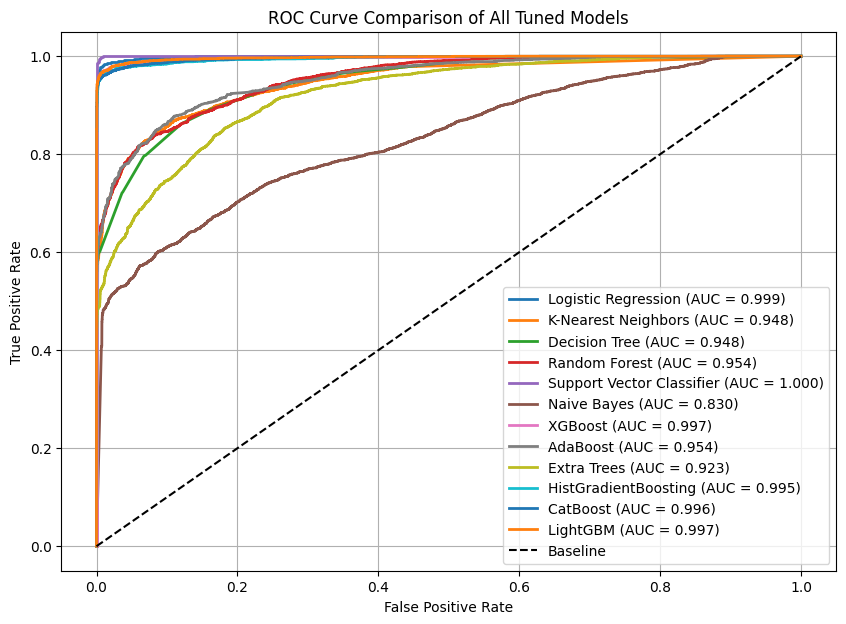

In [56]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, clf in hp_classifiers.items():

    print(f"Generating ROC for: {name}")

    # Get best parameters from tuning
    best_params = hp_tuned_results[name]['Best Params']

    # Apply best params
    tuned_model = clf.set_params(**best_params)

    # Refit on training data
    tuned_model.fit(X_train, y_train)

    # ----------------------------------------------------
    # Get probability scores
    # ----------------------------------------------------
    if hasattr(tuned_model, "predict_proba"):
        y_prob = tuned_model.predict_proba(X_test)[:, 1]

    elif hasattr(tuned_model, "decision_function"):
        scores = tuned_model.decision_function(X_test)
        # scale to 0–1 for ROC
        y_prob = (scores - scores.min()) / (scores.max() - scores.min())

    else:
        print(f"Skipping {name} — no probability or decision function.")
        continue

    # ----------------------------------------------------
    # ROC Curve + AUC Score
    # ----------------------------------------------------
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve for this model
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {auc_value:.3f})")


# ----------------------------------------------------
# Add baseline & formatting
# ----------------------------------------------------
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

plt.title("ROC Curve Comparison of All Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Classification Report + Confusion Matrix


===== XGBoost Classification Report =====

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6921
           1       1.00      0.95      0.97      3825

    accuracy                           0.98     10746
   macro avg       0.99      0.98      0.98     10746
weighted avg       0.98      0.98      0.98     10746



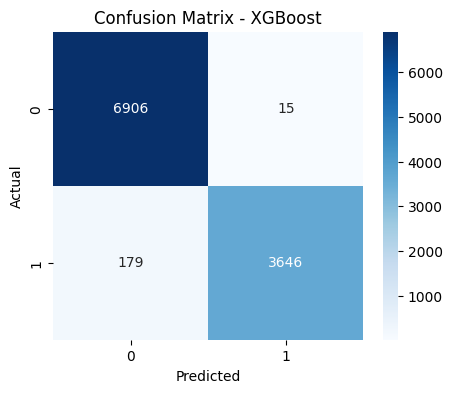

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

# ------------------------------
# Get XGBoost Best Model
# ------------------------------
best_params = hp_tuned_results['XGBoost']['Best Params']

xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

# Predictions
y_pred = xgb_best.predict(X_test)

# ------------------------------
# Classification Report
# ------------------------------
print("\n===== XGBoost Classification Report =====\n")
print(classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [58]:
X_train = train_df.drop(columns = ['is_canceled'])
X_train

,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
0,2.599974,0.786297,-1.428170,-0.142117,0.729836,4.577359,0,-0.214296,-1.917805,0,-0.639687,-1.539434,-0.587189,-1.833978
1,6.704436,0.786297,-1.428170,-0.142117,0.729836,6.209788,0,-0.214296,-1.917805,0,-0.639687,-1.539434,-1.582189,-1.833978
2,-0.881025,-0.952879,-1.428170,-0.142117,-0.523608,-0.319929,0,-0.214296,-0.330249,0,-0.639687,-1.531431,1.016696,-1.833978
3,-0.818678,-0.952879,-2.227617,-0.142117,-0.523608,-0.319929,0,-0.214296,-0.330249,0,-0.639687,-1.531431,0.301694,-1.833978
4,-0.808287,-0.952879,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,0.156602,0,0.762930,-1.523428,0.351707,-1.833978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,0.469811,-0.449433,0.970172,-0.142117,1.356558,-0.319929,0,-0.214296,1.212856,0,0.762930,1.693798,-0.128301,1.549485
94727,0.324336,-1.021531,0.970172,-0.142117,1.356558,-0.319929,0,-0.214296,0.458026,0,0.762930,1.701801,0.640343,1.566660
94954,0.563330,-0.449433,0.970172,-0.142117,1.356558,-0.319929,0,-0.214296,0.572753,0,0.762930,1.733814,-0.220554,1.558072
95150,0.625677,-1.021531,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,1.984196,0,2.165548,1.749820,0.354385,1.558072


In [59]:
y_train = train_df['is_canceled']
y_train

0         0
1         0
2         0
3         0
4         0
         ..
94677     0
94727     0
94954     0
95150     0
103758    0
Name: is_canceled, Length: 53729, dtype: int32

In [60]:
X_test = test_df.copy()
X_test

,lead_time,country,market_segment,previous_cancellations,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
7270,0.584112,-1.135950,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,1.468982,0,-0.639687,0.453326,1.443797,1.575247
7271,0.584112,-1.135950,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,1.468982,0,-0.639687,0.453326,0.560572,1.575247
7272,1.114055,0.786297,-1.428170,-0.142117,-0.523608,1.312500,0,-0.214296,1.680656,0,-0.639687,1.637777,-1.195730,1.575247
7273,1.134838,0.786297,0.970172,-0.142117,1.356558,-0.319929,0,-0.214296,1.739925,0,0.762930,0.197228,0.476007,1.575247
7274,1.799864,0.786297,0.970172,-0.142117,3.236723,-0.319929,0,-0.214296,3.162375,0,-0.639687,0.861481,-0.005815,1.575247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.714768,-1.959771,0.170725,-0.142117,-0.523608,-0.319929,0,-0.214296,0.117231,0,-0.639687,4.847000,-1.046726,4.958710
119386,0.106124,-1.021531,0.970172,-0.142117,1.983279,-0.319929,0,-0.214296,2.853965,0,2.165548,4.855003,1.712177,4.967298
119387,-0.600466,-1.319021,0.970172,-0.142117,1.356558,-0.319929,0,-0.214296,1.420508,0,4.970782,4.855003,0.524465,4.967298
119388,0.178862,-0.952879,0.970172,-0.142117,-0.523608,-0.319929,0,-0.214296,0.292073,0,-0.639687,4.855003,-1.212530,4.967298


In [61]:
# dt_model = DecisionTreeClassifier()
# dt_model.fit(X_train, y_train)
# dt_y_pred = dt_model.predict(X_test)
# dt_y_pred

In [62]:
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# rf_y_pred = rf_model.predict(X_test)
# rf_y_pred

In [63]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_pred

array([1, 1, 0, ..., 0, 0, 0], shape=(65661,))

In [64]:
# # -------------------------
# # Decision Tree + GridSearch
# # -------------------------

# # --------------------------
# # 1. Define the model
# # --------------------------
# dt = DecisionTreeClassifier(random_state=42)

# # --------------------------
# # 2. Define the parameter grid
# # --------------------------
# param_grid = {
#     'max_depth': [3, 5, 7, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # --------------------------
# # 3. Grid Search CV
# # --------------------------
# grid_dt = GridSearchCV(
#     estimator=dt,
#     param_grid=param_grid,
#     cv=5,               # 5-fold cross validation
#     scoring='accuracy', # Metric
#     n_jobs=-1,          # Use all CPU cores
#     verbose=1
# )

# # --------------------------
# # 4. Fit on training data
# # --------------------------
# grid_dt.fit(X_train, y_train)

# # --------------------------
# # 5. Best model
# # --------------------------
# best_dt = grid_dt.best_estimator_
# print("Best Parameters:", grid_dt.best_params_)
# print("Best Score:", grid_dt.best_score_)

# # --------------------------
# # 6. Predict on test data
# # --------------------------
# dt_y_pred = best_dt.predict(X_test)
# print("Predictions:", dt_y_pred)
# dt_y_pred

In [65]:
# # -------------------------
# # Random Forest + GridSearch
# # -------------------------

# # Base model
# rf_model = RandomForestClassifier()

# # Parameter grid
# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Grid search setup
# rf_grid = GridSearchCV(
#     estimator=rf_model,
#     param_grid=rf_param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# # Fit
# rf_grid.fit(X_train, y_train)

# # Best model
# best_rf = rf_grid.best_estimator_
# print("Best Random Forest Model:", best_rf)
# print("Best Parameters:", rf_grid.best_params_)

# # Predict
# rf_y_pred = best_rf.predict(X_test)
# print("Predictions:", rf_y_pred)
# rf_y_pred


In [66]:
# ---------------------------------------
# XGBoost + GridSearchCV
# ---------------------------------------

# Base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Grid search setup
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
xgb_grid.fit(X_train, y_train)

# Best model
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Model:", best_xgb)
print("Best Parameters:", xgb_grid.best_params_)

# Prediction
xgb_y_pred = best_xgb.predict(X_test)
print("Predictions:", xgb_y_pred)
xgb_y_pred

Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\OMEN\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [10:50:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Predictions: [1 1 0 ... 0 0 0]


array([1, 1, 0, ..., 0, 0, 0], shape=(65661,))

In [67]:
# dt_y_pred.shape

In [68]:
xgb_y_pred.shape

(65661,)

In [69]:
X_test.shape

(65661, 14)

In [70]:
test_df.shape

(65661, 14)

In [71]:
X_test.columns

Index(['lead_time', 'country', 'market_segment', 'previous_cancellations',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'name',
       'arrival_date'],
      dtype='object')

In [72]:
test_df.columns

Index(['lead_time', 'country', 'market_segment', 'previous_cancellations',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'name',
       'arrival_date'],
      dtype='object')

🎯 Hotel Booking Cancellation Prediction – Stakeholder View

In [98]:
from IPython.display import HTML, display
import numpy as np

def show_prediction_report(sample, model):
    """
    sample : pandas DataFrame with a single row (1 record)
    model  : trained ML model (best_xgb)
    """

    # --------------------------------------------------------
    # 1. Make prediction
    # --------------------------------------------------------
    pred = model.predict(sample)[0]

    # Predict probability
    prob = model.predict_proba(sample)[0]
    prob_not_cancel = float(prob[0])
    prob_cancel = float(prob[1])

    # Convert to percentages
    prob_not_cancel_percent = round(prob_not_cancel * 100, 2)
    prob_cancel_percent = round(prob_cancel * 100, 2)

    # --------------------------------------------------------
    # 2. Extract fields for display
    # --------------------------------------------------------
    name = sample["name"].values[0]
    arrival_date = sample["arrival_date"].values[0]
    lead_time = sample["lead_time"].values[0]
    country = sample["country"].values[0]
    market_segment = sample["market_segment"].values[0]
    deposit_type = sample["deposit_type"].values[0]
    previous_cancellations = sample["previous_cancellations"].values[0]
    adr = sample["adr"].values[0]
    reserved_room_type = sample["reserved_room_type"].values[0]
    total_of_special_requests = sample["total_of_special_requests"].values[0]
    customer_type = sample["customer_type"].values[0]
    required_car_parking_spaces = sample["required_car_parking_spaces"].values[0]
    booking_changes = sample["booking_changes"].values[0]

    # --------------------------------------------------------
    # 3. Beautiful HTML Template Output
    # --------------------------------------------------------
    html = f"""
    <div style="font-family:Arial; padding:25px; border:2px solid #ddd; 
                border-radius:16px; width:75%; background:#f9fbfd;">

        <h2 style="color:#2b547e; margin-bottom:5px;">Guest Prediction Report</h2>

        <h3 style="color:#444;">Guest Name:</h3>
        <p style="font-size:18px;"><b>{name}</b></p>

        <h3 style="color:#444;">Arrival Date:</h3>
        <p style="font-size:18px;"><b>{arrival_date}</b></p>

        <hr>

        <h3 style="color:#2b547e;">Booking Pattern Summary</h3>

        <ul style="font-size:16px; line-height:1.6;">
            <li><b>Lead Time:</b> {lead_time} days</li>
            <li><b>Country:</b> {country}</li>
            <li><b>Market Segment:</b> {market_segment}</li>
            <li><b>Deposit Type:</b> {deposit_type}</li>
            <li><b>Previous Cancellations:</b> {previous_cancellations}</li>
            <li><b>ADR:</b> {adr}</li>
            <li><b>Reserved Room Type:</b> {reserved_room_type}</li>
            <li><b>Special Requests:</b> {total_of_special_requests}</li>
            <li><b>Customer Type:</b> {customer_type}</li>
            <li><b>Car Parking Spaces:</b> {required_car_parking_spaces}</li>
            <li><b>Booking Changes:</b> {booking_changes}</li>
        </ul>

        <hr>

        <h3 style="color:#2b547e;">Model Prediction</h3>
        <p style="font-size:20px; margin-top:5px;">
            <b>Will Cancel? → 
            <span style="color:{'red' if pred==1 else 'green'};">
                {pred}
            </span></b>
        </p>

        <h3 style="color:#2b547e;">Prediction Probability</h3>
        <ul style="font-size:16px; line-height:1.6;">
            <li><b>Cancel:</b> {prob_cancel_percent}%</li>
            <li><b>Not Cancel:</b> {prob_not_cancel_percent}%</li>
        </ul>

    </div>
    """

    display(HTML(html))


# -------------------------------------------------------------
# EXAMPLE USAGE
# -------------------------------------------------------------

# Select one sample (e.g., first row)
# sample = test_df.iloc[[0]]   # double brackets → keeps DataFrame format
sample = test_df.sample(6785)

# Show prediction using FINAL model
show_prediction_report(sample, best_xgb)

LIVE-PREDICTION - 🎯 Hotel Booking Cancellation Prediction – Stakeholder View

In [74]:
# Install if required
%pip install ipywidgets 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
# import warnings
# warnings.filterwarnings("ignore")

# import ipywidgets as widgets
# from IPython.display import display, HTML
# import pandas as pd
# import numpy as np


# # ------------------------------------------------------------
# # LOAD YOUR MODEL  (UPDATED)
# # ------------------------------------------------------------
# # Your model is already trained and saved in variable best_xgb
# # So we directly use it (NO joblib load)
# model = best_xgb


# # ------------------------------------------------------------
# # FUNCTION: HTML REPORT
# # ------------------------------------------------------------
# def show_prediction_report(sample, model):
#     pred = model.predict(sample)[0]

#     # Probability
#     prob = model.predict_proba(sample)[0]
#     prob_not_cancel = round(float(prob[0]) * 100, 2)  # %
#     prob_cancel = round(float(prob[1]) * 100, 2)      # %

#     # Extract fields
#     name = sample["name"].values[0]
#     arrival_date = sample["arrival_date"].values[0]
#     lead_time = sample["lead_time"].values[0]
#     country = sample["country"].values[0]
#     market_segment = sample["market_segment"].values[0]
#     deposit_type = sample["deposit_type"].values[0]
#     previous_cancellations = sample["previous_cancellations"].values[0]
#     adr = sample["adr"].values[0]
#     reserved_room_type = sample["reserved_room_type"].values[0]
#     total_of_special_requests = sample["total_of_special_requests"].values[0]
#     customer_type = sample["customer_type"].values[0]
#     required_car_parking_spaces = sample["required_car_parking_spaces"].values[0]
#     booking_changes = sample["booking_changes"].values[0]

#     # HTML
#     html = f"""
#     <div style="font-family:Arial; padding:20px; border:2px solid #ddd; border-radius:12px; width:70%; background:#fafafa;">
    
#         <h2 style="color:#2b547e;">Guest Prediction Report</h2>

#         <h3>Guest Name</h3>
#         <p><b>{name}</b></p>

#         <h3>Arrival Date</h3>
#         <p><b>{arrival_date}</b></p>

#         <hr>

#         <h3 style="color:#2b547e;">Booking Pattern Summary</h3>
#         <ul>
#             <li><b>Lead Time:</b> {lead_time} days</li>
#             <li><b>Country:</b> {country}</li>
#             <li><b>Market Segment:</b> {market_segment}</li>
#             <li><b>Deposit Type:</b> {deposit_type}</li>
#             <li><b>Previous Cancellations:</b> {previous_cancellations}</li>
#             <li><b>ADR:</b> {adr}</li>
#             <li><b>Reserved Room Type:</b> {reserved_room_type}</li>
#             <li><b>Special Requests:</b> {total_of_special_requests}</li>
#             <li><b>Customer Type:</b> {customer_type}</li>
#             <li><b>Car Parking Spaces:</b> {required_car_parking_spaces}</li>
#             <li><b>Booking Changes:</b> {booking_changes}</li>
#         </ul>

#         <hr>

#         <h3 style="color:#2b547e;">Prediction</h3>
#         <p style="font-size:20px;">
#             <b>Will Cancel? → 
#             <span style="color:{'red' if pred==1 else 'green'};">
#                 {"Yes (Cancel)" if pred==1 else "No (Not Cancel)"}
#             </span></b>
#         </p>

#         <h3 style="color:#2b547e;">Prediction Probability</h3>
#         <ul>
#             <li><b>Cancel:</b> {prob_cancel}%</li>
#             <li><b>Not Cancel:</b> {prob_not_cancel}%</li>
#         </ul>

#     </div>
#     """

#     display(HTML(html))


# # ------------------------------------------------------------
# # LIVE INPUT FORM
# # ------------------------------------------------------------

# label_layout = widgets.Layout(width="250px")   # controls label width

# name = widgets.Text(description="Name", layout=label_layout)
# arrival_date = widgets.Text(description="Arrival Date", layout=label_layout)
# lead_time = widgets.IntSlider(description="Lead Time", min=0, max=500, layout=label_layout)
# country = widgets.Text(description="Country", layout=label_layout)
# market_segment = widgets.Text(description="Market Segment", layout=label_layout)
# deposit_type = widgets.Text(description="Deposit Type", layout=label_layout)
# previous_cancellations = widgets.IntSlider(description="Previous Cancel", min=0, max=10, layout=label_layout)
# adr = widgets.FloatSlider(description="ADR", min=0, max=500, layout=label_layout)
# reserved_room_type = widgets.Text(description="Reserved Room Type", layout=label_layout)
# total_of_special_requests = widgets.IntSlider(description="Special Requests", min=0, max=5, layout=label_layout)
# customer_type = widgets.Text(description="Customer Type", layout=label_layout)
# required_car_parking_spaces = widgets.IntSlider(description="Car Parking Spaces", min=0, max=5, layout=label_layout)
# booking_changes = widgets.IntSlider(description="Booking Changes", min=0, max=10, layout=label_layout)

# predict_btn = widgets.Button(description="Predict", button_style="success")

# # ------------------------------------------------------------
# # ON CLICK → RUN PREDICTION
# # ------------------------------------------------------------
# def on_predict_clicked(b):
#     sample = pd.DataFrame([{
#         "name": name.value,
#         "arrival_date": arrival_date.value,
#         "lead_time": lead_time.value,
#         "country": country.value,
#         "market_segment": market_segment.value,
#         "deposit_type": deposit_type.value,
#         "previous_cancellations": previous_cancellations.value,
#         "adr": adr.value,
#         "reserved_room_type": reserved_room_type.value,
#         "total_of_special_requests": total_of_special_requests.value,
#         "customer_type": customer_type.value,
#         "required_car_parking_spaces": required_car_parking_spaces.value,
#         "booking_changes": booking_changes.value
#     }])

#     show_prediction_report(sample, model)


# predict_btn.on_click(on_predict_clicked)


# # ------------------------------------------------------------
# # DISPLAY THE INTERFACE
# # ------------------------------------------------------------
# display(
#     widgets.VBox([
#         name, arrival_date, lead_time, country, market_segment, deposit_type,
#         previous_cancellations, adr, reserved_room_type, total_of_special_requests,
#         customer_type, required_car_parking_spaces, booking_changes, predict_btn
#     ])
# )

In [90]:
# import warnings
# warnings.filterwarnings("ignore")

# import ipywidgets as widgets
# from IPython.display import display, HTML
# import pandas as pd
# import numpy as np

# from sklearn.preprocessing import LabelEncoder, StandardScaler


# # ============================================================
# # 1️⃣ LIVE PREPROCESSING (FIT LABEL ENCODERS & SCALER)
# # ============================================================

# # Dictionary to store fitted encoders
# label_encoders = {}

# # --- Fit Label Encoders on ALL categorical columns ---
# for col in cat_cols:
#     le = LabelEncoder()
#     combined_values = pd.concat([train_df[col], test_df[col]], axis=0).astype(str)
#     le.fit(combined_values)
#     label_encoders[col] = le

# # --- Fit Standard Scaler on continuous numeric cols ---
# scaler = StandardScaler()
# scaler.fit(train_df[continuous_numeric_cols])


# # ============================================================
# # 2️⃣ YOUR TRAINED MODEL
# # ============================================================
# model = best_xgb     # ← already trained using GridSearchCV


# # ============================================================
# # 3️⃣ MODEL FEATURES (Exclude name + arrival_date)
# # ============================================================
# model_features = [
#     "lead_time", "country", "market_segment", "deposit_type",
#     "previous_cancellations", "adr", "reserved_room_type",
#     "total_of_special_requests", "customer_type",
#     "required_car_parking_spaces", "booking_changes"
# ]


# # ============================================================
# # 4️⃣ HTML REPORT (Stakeholder Friendly)
# # ============================================================
# def show_prediction_report(raw, processed, model):

#     pred = model.predict(processed)[0]
#     prob = model.predict_proba(processed)[0]

#     prob_not_cancel = round(float(prob[0]) * 100, 2)
#     prob_cancel = round(float(prob[1]) * 100, 2)

#     html = f"""
#     <div style="font-family:Arial; padding:20px; border:2px solid #ddd; 
#                 border-radius:12px; width:75%; background:#fafafa;">
    
#         <h2 style="color:#2b547e;">Guest Prediction Report</h2>

#         <h3>Guest Name</h3>
#         <p><b>{raw['name']}</b></p>

#         <h3>Arrival Date</h3>
#         <p><b>{raw['arrival_date']}</b></p>

#         <hr>

#         <h3 style="color:#2b547e;">Booking Pattern Summary</h3>
#         <ul>
#             <li><b>Lead Time:</b> {raw['lead_time']} days</li>
#             <li><b>Country:</b> {raw['country']}</li>
#             <li><b>Market Segment:</b> {raw['market_segment']}</li>
#             <li><b>Deposit Type:</b> {raw['deposit_type']}</li>
#             <li><b>Previous Cancellations:</b> {raw['previous_cancellations']}</li>
#             <li><b>ADR:</b> {raw['adr']}</li>
#             <li><b>Reserved Room Type:</b> {raw['reserved_room_type']}</li>
#             <li><b>Special Requests:</b> {raw['total_of_special_requests']}</li>
#             <li><b>Customer Type:</b> {raw['customer_type']}</li>
#             <li><b>Car Parking:</b> {raw['required_car_parking_spaces']}</li>
#             <li><b>Booking Changes:</b> {raw['booking_changes']}</li>
#         </ul>

#         <hr>

#         <h3 style="color:#2b547e;">Prediction</h3>
#         <p style="font-size:20px;">
#             <b>Will Cancel? → 
#             <span style="color:{'red' if pred==1 else 'green'};">
#                 {"Yes (Cancel)" if pred==1 else "No (Not Cancel)"}
#             </span></b>
#         </p>

#         <h3 style="color:#2b547e;">Prediction Probability</h3>
#         <ul>
#             <li><b>Cancel:</b> {prob_cancel}%</li>
#             <li><b>Not Cancel:</b> {prob_not_cancel}%</li>
#         </ul>

#     </div>
#     """

#     display(HTML(html))


# # ============================================================
# # 5️⃣ WIDGETS (Beautiful Alignment)
# # ============================================================
# label_layout = widgets.Layout(width="300px")

# name = widgets.Text(description="Guest Name", layout=label_layout)
# arrival_date = widgets.Text(description="Arrival Date", layout=label_layout)

# lead_time = widgets.IntSlider(description="Lead Time", min=0, max=500, layout=label_layout)
# country = widgets.Text(description="Country", layout=label_layout)
# market_segment = widgets.Text(description="Market Segment", layout=label_layout)
# deposit_type = widgets.Text(description="Deposit Type", layout=label_layout)
# previous_cancellations = widgets.IntSlider(description="Prev Cancellations", min=0, max=20, layout=label_layout)
# adr = widgets.FloatSlider(description="ADR", min=0, max=500, layout=label_layout)
# reserved_room_type = widgets.Text(description="Room Type", layout=label_layout)
# total_of_special_requests = widgets.IntSlider(description="Special Requests", min=0, max=5, layout=label_layout)
# customer_type = widgets.Text(description="Customer Type", layout=label_layout)
# required_car_parking_spaces = widgets.IntSlider(description="Parking Spaces", min=0, max=5, layout=label_layout)
# booking_changes = widgets.IntSlider(description="Booking Changes", min=0, max=10, layout=label_layout)

# predict_btn = widgets.Button(description="Predict", button_style="success")


# # ============================================================
# # 6️⃣ PREDICT FUNCTION (Handles unseen labels safely)
# # ============================================================
# def on_predict_clicked(b):

#     # raw (human readable)
#     raw = {
#         "name": name.value,
#         "arrival_date": arrival_date.value,
#         "lead_time": lead_time.value,
#         "country": country.value,
#         "market_segment": market_segment.value,
#         "deposit_type": deposit_type.value,
#         "previous_cancellations": previous_cancellations.value,
#         "adr": adr.value,
#         "reserved_room_type": reserved_room_type.value,
#         "total_of_special_requests": total_of_special_requests.value,
#         "customer_type": customer_type.value,
#         "required_car_parking_spaces": required_car_parking_spaces.value,
#         "booking_changes": booking_changes.value
#     }

#     raw_df = pd.DataFrame([raw])

#     # df for model
#     df = raw_df[model_features].copy()

#     # --- SAFE Label Encoding (handle unseen values) ---
#     for col in df.columns:
#         if col in label_encoders:
#             le = label_encoders[col]

#             # Set unknown values to "Unknown"
#             df[col] = df[col].astype(str).apply(
#                 lambda x: x if x in le.classes_ else "Unknown"
#             )

#             # Add "Unknown" class if not in encoder
#             if "Unknown" not in le.classes_:
#                 le.classes_ = np.append(le.classes_, "Unknown")

#             df[col] = le.transform(df[col])

#     # --- Scaling ---
#     df[continuous_numeric_cols] = scaler.transform(df[continuous_numeric_cols])

#     # Predict
#     show_prediction_report(raw, df, model)


# predict_btn.on_click(on_predict_clicked)


# # ============================================================
# # 7️⃣ DISPLAY UI
# # ============================================================
# display(
#     widgets.VBox([
#         name, arrival_date,
#         lead_time, country, market_segment, deposit_type,
#         previous_cancellations, adr, reserved_room_type,
#         total_of_special_requests, customer_type,
#         required_car_parking_spaces, booking_changes,
#         predict_btn
#     ])
# )

In [94]:
from IPython.display import HTML, display
import numpy as np

def show_prediction_report(sample, model):
    """
    sample : pandas DataFrame with a single row (1 record)
    model  : trained ML model (best_xgb)
    """

    # --------------------------------------------------------
    # 1. Make prediction
    # --------------------------------------------------------
    pred = model.predict(sample)[0]

    # Predict probability
    prob = model.predict_proba(sample)[0]
    prob_not_cancel = float(prob[0])
    prob_cancel = float(prob[1])

    # Convert to percentages
    prob_not_cancel_percent = round(prob_not_cancel * 100, 2)
    prob_cancel_percent = round(prob_cancel * 100, 2)

    # --------------------------------------------------------
    # 2. Extract fields for display
    # --------------------------------------------------------
    name = sample["name"].values[0]
    arrival_date = sample["arrival_date"].values[0]
    lead_time = sample["lead_time"].values[0]
    country = sample["country"].values[0]
    market_segment = sample["market_segment"].values[0]
    deposit_type = sample["deposit_type"].values[0]
    previous_cancellations = sample["previous_cancellations"].values[0]
    adr = sample["adr"].values[0]
    reserved_room_type = sample["reserved_room_type"].values[0]
    total_of_special_requests = sample["total_of_special_requests"].values[0]
    customer_type = sample["customer_type"].values[0]
    required_car_parking_spaces = sample["required_car_parking_spaces"].values[0]
    booking_changes = sample["booking_changes"].values[0]

    # --------------------------------------------------------
    # 3. Beautiful HTML Template Output
    # --------------------------------------------------------
    html = f"""
    <div style="font-family:Arial; padding:25px; border:2px solid #ddd; 
                border-radius:16px; width:75%; background:#f9fbfd;">

        <h2 style="color:#2b547e; margin-bottom:5px;">Guest Prediction Report</h2>

        <h3 style="color:#444;">Guest Name:</h3>
        <p style="font-size:18px;"><b>{name}</b></p>

        <h3 style="color:#444;">Arrival Date:</h3>
        <p style="font-size:18px;"><b>{arrival_date}</b></p>

        <hr>

        <h3 style="color:#2b547e;">Booking Pattern Summary</h3>

        <ul style="font-size:16px; line-height:1.6;">
            <li><b>Lead Time:</b> {lead_time} days</li>
            <li><b>Country:</b> {country}</li>
            <li><b>Market Segment:</b> {market_segment}</li>
            <li><b>Deposit Type:</b> {deposit_type}</li>
            <li><b>Previous Cancellations:</b> {previous_cancellations}</li>
            <li><b>ADR:</b> {adr}</li>
            <li><b>Reserved Room Type:</b> {reserved_room_type}</li>
            <li><b>Special Requests:</b> {total_of_special_requests}</li>
            <li><b>Customer Type:</b> {customer_type}</li>
            <li><b>Car Parking Spaces:</b> {required_car_parking_spaces}</li>
            <li><b>Booking Changes:</b> {booking_changes}</li>
        </ul>

        <hr>

        <h3 style="color:#2b547e;">Model Prediction</h3>
        <p style="font-size:20px; margin-top:5px;">
            <b>Will Cancel? → 
            <span style="color:{'red' if pred==1 else 'green'};">
                {pred}
            </span></b>
        </p>

        <h3 style="color:#2b547e;">Prediction Probability</h3>
        <ul style="font-size:16px; line-height:1.6;">
            <li><b>Cancel:</b> {prob_cancel_percent}%</li>
            <li><b>Not Cancel:</b> {prob_not_cancel_percent}%</li>
        </ul>

    </div>
    """

    display(HTML(html))


# -------------------------------------------------------------
# EXAMPLE USAGE
# -------------------------------------------------------------

# Select one sample (e.g., first row)
# sample = test_df.iloc[[0]]   # double brackets → keeps DataFrame format
sample = test_df.sample(36)

# Show prediction using FINAL model
show_prediction_report(sample, best_xgb)